# Using Reinforcement Learning with Proximal Policy Optimization to create an AI that plays *Super Mario Bros*

# 1. Setup

In [1]:
!pip install gym_super_mario_bros==7.4.0 nes_py


In [2]:
# Import the game
import gym
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT

In [3]:
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT
print(COMPLEX_MOVEMENT)

[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left'], ['left', 'A'], ['left', 'B'], ['left', 'A', 'B'], ['down'], ['up']]


In [4]:
# This line helps with oypadSpace.reset() got an unexpected keyword argument 'seed'
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

#-----------------------------------------------------------------------------------------------------

# Setup game
# This creates the environment which will be used for testing the emulation
    # SuperMarioBros-v0 - the environment used for this projecxt (out of date warning does not present an issue)
    # apply_api_compatibility=True - is used when the Gym version is 0.26 or newer. It indicates that the environment should apply compatibility adjustments to ensure consistency with the Gym API.
    # render_mode = "human" - displays the game in the normal 16-bit mode (there are multpile render modes that can simplified textures)
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode='human')
    
# Asigns the actions possible for the agent (list of lists from gym_super_mario_bros containig combinations of actions)
env = JoypadSpace(env, COMPLEX_MOVEMENT)
    
# The env.reset() method is used to reset the environment to its initial state and obtain the initial observation. In reinforcement learning environments, this method is commonly used to start a new episode.
env.reset()

C:\Users\Dragos\anaconda3\envs\AI_Environment\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
C:\Users\Dragos\anaconda3\envs\AI_Environment\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [228,  92,  16],
         [  0,   0,   0]],
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [4]:
# REQUIRES KeyboardInterrupt IN ORDER TO PROCEED WITH THE OTHER CELLS

#-----------------------------------------------------------------------------------------------------

# PLAY TEST

# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the game
        env.reset()
    # Do random actions
    next_state, reward, done, trunc, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

C:\Users\Dragos\anaconda3\envs\AI_Environment\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
C:\Users\Dragos\anaconda3\envs\AI_Environment\Lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


KeyboardInterrupt: 

In [5]:
env.reset()

(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [228,  92,  16],
         [  0,   0,   0]],
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [6]:
# Closes the emulator's window and prevents potential error in the training loop to be raised because of an instance of the emulator still being on
env.close()

# 2. Preprocess Environment

In [7]:
# Install pytorch
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [8]:
# Install stable baselines for RL stuff
!pip install stable-baselines3[extra]

In [9]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [10]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode='human')
# 2. Simplify the controls 
env = JoypadSpace(env, COMPLEX_MOVEMENT)
# 3. Grayscale
    # GrayScaleObservation wrapper is applied to the environment, converting the color observations to grayscale. 
    #The keep_dim=True argument indicates that the grayscale observations should retain the same dimensionality as the original color observations.
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
    # You wrap the environment inside a DummyVecEnv, which is a vectorized environment. 
    # This wrapper is often used with stable-baselines3 to handle multiple parallel environments efficiently. 
    # The [lambda: env] construct is a way to create a function that returns the environment. 
    # It's a workaround to pass a single environment to DummyVecEnv.
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

C:\Users\Dragos\anaconda3\envs\AI_Environment\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
C:\Users\Dragos\anaconda3\envs\AI_Environment\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(
C:\Users\Dragos\anaconda3\envs\AI_Environment\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [11]:
# Required before using step
state = env.reset()

In [12]:
# The shape (240, 256, 4) represents the dimensions of the observation returned by the environment after calling env.reset().

# In this context:
# 240: This is the height of the observation image in pixels. The environment is providing an image that is 240 pixels tall.
# 256: This is the width of the observation image in pixels. The image is 256 pixels wide.
# 4: This indicates that the image has 4 channels. 
    # In the context of reinforcement learning environments, each channel often corresponds to a different frame in a sequence. 
    # Each frame is a grayscale image, as indicated by the shape.

state[0].shape

(240, 256, 4)

In [13]:
# In the code state, reward, done, info = env.step([5]), we are taking a step in the environment by performing the action corresponding to the value 5. Let's break down the components of this statement:
    # env.step([5]): This method is used to advance the environment by one time step. It takes an action as an argument, and in this case, the action is specified as [5]. The action is an array because environments can support multi-dimensional action spaces, and each element of the array corresponds to an action dimension.
    # state: After taking a step, state represents the new observation or state of the environment. This observation typically contains information about the current state of the environment, such as pixel values in the case of image-based environments.
    # reward: The reward variable holds the numerical reward obtained by the agent for the action it took. The reward is a scalar value that reflects the immediate benefit or cost associated with the action.
    # done: The done variable is a boolean flag that indicates whether the episode is done or not. If done is True, it means the current episode has terminated, and the environment needs to be reset for a new episode.
    # info: The info variable contains additional information about the environment's internal state or any auxiliary information that can be useful for debugging or analysis. It is often an empty dictionary in simple environments.

state, reward, done, info = env.step([5])

C:\Users\Dragos\anaconda3\envs\AI_Environment\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


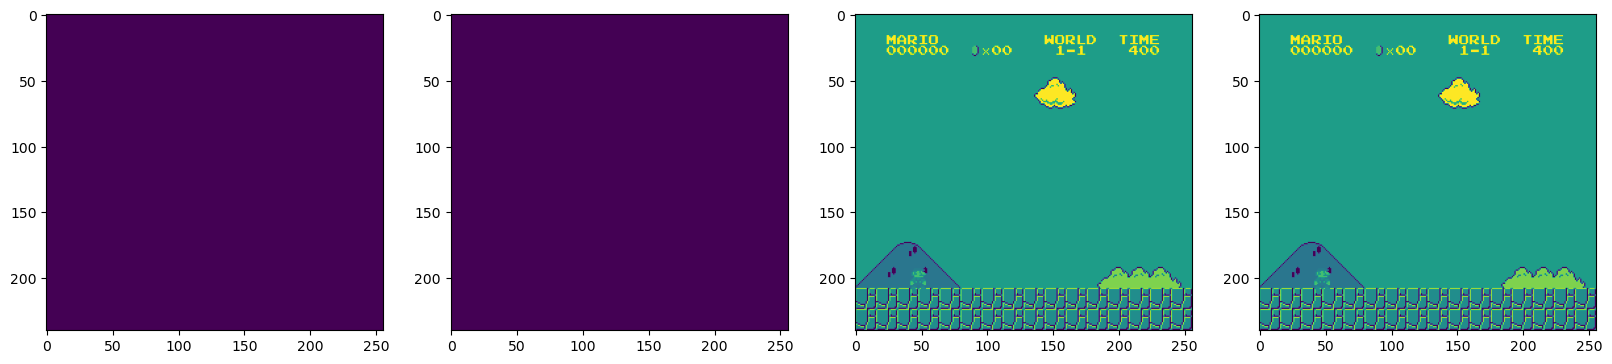

In [14]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [15]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [16]:
class TrainAndLoggingCallback(BaseCallback):
    """
    TrainAndLoggingCallback Class:

    Description: This class is a custom callback for reinforcement learning training using the stable-baselines3 library. It extends the BaseCallback class provided by stable-baselines3, allowing users to perform custom actions during the training process, such as saving the model at specified intervals.
    Constructor:
    Parameters:
    check_freq: Integer, specifies the frequency at which to save the model during training.
    save_path: String, the directory path where the saved models will be stored.
    verbose: Integer, controls the verbosity level of the callback (default is 1).

    """

    def __init__(self, check_freq, save_path, verbose=1):
        """
        __init__ Method:

        Description: Initializes an instance of the TrainAndLoggingCallback class.
        Parameters:
        check_freq: Integer, specifies the frequency at which to save the model during training.
        save_path: String, the directory path where the saved models will be stored.
        verbose: Integer, controls the verbosity level of the callback (default is 1).
        """
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        """
        _init_callback Method:

        Description: Initializes the callback. If save_path is provided, it creates the directory if it does not exist.
        Parameters: None.
        """
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        """
        _on_step Method:

        Description: Called at each training step. Checks if the current training step is a multiple of check_freq and, if true, saves the model to the specified path.
        Parameters: None.
        Returns:
        True: Indicating that the training should continue.
        """
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [17]:
CHECKPOINT_DIR = '/train'
LOG_DIR = '/log'

In [18]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

## PPO - Documentation

The Proximal Policy Optimization algorithm combines ideas from A2C (having multiple workers) and TRPO (it uses a trust region to improve the actor).

The main idea is that after an update, the new policy should be not too far from the old policy. For that, ppo uses clipping to avoid too large update.

>Note
PPO contains several modifications from the original algorithm not documented by OpenAI: advantages are normalized and value function can be also clipped.

### Usage

>Note
A recurrent version of PPO is available in our contrib repo: https://sb3-contrib.readthedocs.io/en/master/modules/ppo_recurrent.html

- Recurrent policies: no
- Multi processing: yes
- Gym spaces:

|    Space        | Action | Observation |
|-----------------|--------|-------------|
|    Discrete     |   yes  |     yes     |
|       Box       |   yes  |     yes     |
|  MultiDiscrete  |   yes  |     yes     |
|   MultiBinary   |   yes  |     yes     |
|      Dict       |   no   |     yes     |

### Parameters

>classstable_baselines3.ppo.PPO(policy, env, learning_rate=0.0003, n_steps=2048, batch_size=64, n_epochs=10, gamma=0.99, gae_lambda=0.95, clip_range=0.2, clip_range_vf=None, normalize_advantage=True, ent_coef=0.0, vf_coef=0.5, max_grad_norm=0.5, use_sde=False, sde_sample_freq=-1, rollout_buffer_class=None, rollout_buffer_kwargs=None, target_kl=None, stats_window_size=100, tensorboard_log=None, policy_kwargs=None, verbose=0, seed=None, device='auto', _init_setup_model=True)

- policy (ActorCriticPolicy) – The policy model to use (MlpPolicy, CnnPolicy, …)
- env (Env | VecEnv | str) – The environment to learn from (if registered in Gym, can be str)
- learning_rate (float | Callable[[float], float]) – The learning rate, it can be a function of the current progress remaining (from 1 to 0)
- n_steps (int) – The number of steps to run for each environment per update (i.e. rollout buffer size is n_steps * n_envs where n_envs is number of environment copies running in parallel) NOTE: n_steps * n_envs must be greater than 1 (because of the advantage normalization) See https://github.com/pytorch/pytorch/issues/29372
- batch_size (int) – Minibatch size
- n_epochs (int) – Number of epoch when optimizing the surrogate loss
- gamma (float) – Discount factor
- gae_lambda (float) – Factor for trade-off of bias vs variance for Generalized Advantage Estimator
- clip_range (float | Callable[[float], float]) – Clipping parameter, it can be a function of the current progress remaining (from 1 to 0).
- clip_range_vf (None | float | Callable[[float], float]) – Clipping parameter for the value function, it can be a function of the current progress remaining (from 1 to 0). This is a parameter specific to the OpenAI implementation. If None is passed (default), no clipping will be done on the value function. IMPORTANT: this clipping depends on the reward scaling.
- normalize_advantage (bool) – Whether to normalize or not the advantage
- ent_coef (float) – Entropy coefficient for the loss calculation
- vf_coef (float) – Value function coefficient for the loss calculation
- max_grad_norm (float) – The maximum value for the gradient clipping
- use_sde (bool) – Whether to use generalized State Dependent Exploration (gSDE) instead of action noise exploration (default: False)
- sde_sample_freq (int) – Sample a new noise matrix every n steps when using gSDE Default: -1 (only sample at the beginning of the rollout)
- rollout_buffer_class (Type[RolloutBuffer] | None) – Rollout buffer class to use. If None, it will be automatically selected.
- rollout_buffer_kwargs (Dict[str, Any] | None) – Keyword arguments to pass to the rollout buffer on creation
- target_kl (float | None) – Limit the KL divergence between updates, because the clipping is not enough to prevent large update see issue #213 (cf https://github.com/hill-a/stable-baselines/issues/213) By default, there is no limit on the kl div.
- stats_window_size (int) – Window size for the rollout logging, specifying the number of episodes to average the reported success rate, mean episode length, and mean reward over
- tensorboard_log (str | None) – the log location for tensorboard (if None, no logging)
- policy_kwargs (Dict[str, Any] | None) – additional arguments to be passed to the policy on creation
- verbose (int) – Verbosity level: 0 for no output, 1 for info messages (such as device or wrappers used), 2 for debug messages
- seed (int | None) – Seed for the pseudo random generators
- device (device | str) – Device (cpu, cuda, …) on which the code should be run. Setting it to auto, the code will be run on the GPU if possible.
- _init_setup_model (bool) – Whether or not to build the network at the creation of the instance

### Loss

In the Proximal Policy Optimization (PPO) algorithm implemented in stable-baselines3, the loss function used is the *Clipped Surrogate Objective*.

The PPO algorithm aims to maximize the expected cumulative reward, subject to a constraint on the policy change from the previous policy. The clipped surrogate objective helps to prevent overly large policy updates that can destabilize the training.

The clipped surrogate objective can be expressed as follows:

$$ L^{CLIP}(\theta) = \hat{\mathbb{E}}_t \left[ \min(r_t(\theta) \hat{A}_t, \text{clip}(r_t(\theta), 1 - \epsilon, 1 + \epsilon) \hat{A}_t) \right] $$

Here:

- $ L^{CLIP}(\theta) $ is the clipped surrogate objective.
- $ \hat{\mathbb{E}}_t $ is the empirical expectation over a batch of samples collected during a rollout.
- $ (\theta) $ represents the parameters of the policy.
- $ r_t(\theta) $ is the ratio of the probability of the new policy to the old policy for the taken action at time.
- $ \hat{A}_t $ is the estimated advantage at time
- $ \text{clip}(x, a, b) $ is a function that clips the value of x to be between a and b

The key idea here is that the policy update is constrained to be close to the policy from the previous iteration, ensuring stability during training. The hyperparameter ϵ determines the size of the allowed policy update.

This loss function is used during the optimization step of PPO to update the policy parameters to maximize expected cumulative rewards while respecting the policy change constraint. The PPO algorithm also includes an entropy bonus term to encourage exploration. The overall objective function combines the clipped surrogate objective and the entropy bonus.

### PPO implementation according to stable-baseline3

```python
import warnings
from typing import Any, ClassVar, Dict, Optional, Type, TypeVar, Union

import numpy as np
import torch as th
from gymnasium import spaces
from torch.nn import functional as F

from stable_baselines3.common.buffers import RolloutBuffer
from stable_baselines3.common.on_policy_algorithm import OnPolicyAlgorithm
from stable_baselines3.common.policies import ActorCriticCnnPolicy, ActorCriticPolicy, BasePolicy, MultiInputActorCriticPolicy
from stable_baselines3.common.type_aliases import GymEnv, MaybeCallback, Schedule
from stable_baselines3.common.utils import explained_variance, get_schedule_fn

SelfPPO = TypeVar("SelfPPO", bound="PPO")


class PPO(OnPolicyAlgorithm):
    """
    Proximal Policy Optimization algorithm (PPO) (clip version)

    Paper: https://arxiv.org/abs/1707.06347
    Code: This implementation borrows code from OpenAI Spinning Up (https://github.com/openai/spinningup/)
    https://github.com/ikostrikov/pytorch-a2c-ppo-acktr-gail and
    Stable Baselines (PPO2 from https://github.com/hill-a/stable-baselines)

    Introduction to PPO: https://spinningup.openai.com/en/latest/algorithms/ppo.html

    :param policy: The policy model to use (MlpPolicy, CnnPolicy, ...)
    :param env: The environment to learn from (if registered in Gym, can be str)
    :param learning_rate: The learning rate, it can be a function
        of the current progress remaining (from 1 to 0)
    :param n_steps: The number of steps to run for each environment per update
        (i.e. rollout buffer size is n_steps * n_envs where n_envs is number of environment copies running in parallel)
        NOTE: n_steps * n_envs must be greater than 1 (because of the advantage normalization)
        See https://github.com/pytorch/pytorch/issues/29372
    :param batch_size: Minibatch size
    :param n_epochs: Number of epoch when optimizing the surrogate loss
    :param gamma: Discount factor
    :param gae_lambda: Factor for trade-off of bias vs variance for Generalized Advantage Estimator
    :param clip_range: Clipping parameter, it can be a function of the current progress
        remaining (from 1 to 0).
    :param clip_range_vf: Clipping parameter for the value function,
        it can be a function of the current progress remaining (from 1 to 0).
        This is a parameter specific to the OpenAI implementation. If None is passed (default),
        no clipping will be done on the value function.
        IMPORTANT: this clipping depends on the reward scaling.
    :param normalize_advantage: Whether to normalize or not the advantage
    :param ent_coef: Entropy coefficient for the loss calculation
    :param vf_coef: Value function coefficient for the loss calculation
    :param max_grad_norm: The maximum value for the gradient clipping
    :param use_sde: Whether to use generalized State Dependent Exploration (gSDE)
        instead of action noise exploration (default: False)
    :param sde_sample_freq: Sample a new noise matrix every n steps when using gSDE
        Default: -1 (only sample at the beginning of the rollout)
    :param rollout_buffer_class: Rollout buffer class to use. If ``None``, it will be automatically selected.
    :param rollout_buffer_kwargs: Keyword arguments to pass to the rollout buffer on creation
    :param target_kl: Limit the KL divergence between updates,
        because the clipping is not enough to prevent large update
        see issue #213 (cf https://github.com/hill-a/stable-baselines/issues/213)
        By default, there is no limit on the kl div.
    :param stats_window_size: Window size for the rollout logging, specifying the number of episodes to average
        the reported success rate, mean episode length, and mean reward over
    :param tensorboard_log: the log location for tensorboard (if None, no logging)
    :param policy_kwargs: additional arguments to be passed to the policy on creation
    :param verbose: Verbosity level: 0 for no output, 1 for info messages (such as device or wrappers used), 2 for
        debug messages
    :param seed: Seed for the pseudo random generators
    :param device: Device (cpu, cuda, ...) on which the code should be run.
        Setting it to auto, the code will be run on the GPU if possible.
    :param _init_setup_model: Whether or not to build the network at the creation of the instance
    """

    policy_aliases: ClassVar[Dict[str, Type[BasePolicy]]] = {
        "MlpPolicy": ActorCriticPolicy,
        "CnnPolicy": ActorCriticCnnPolicy,
        "MultiInputPolicy": MultiInputActorCriticPolicy,
    }

    def __init__(
        self,
        policy: Union[str, Type[ActorCriticPolicy]],
        env: Union[GymEnv, str],
        learning_rate: Union[float, Schedule] = 3e-4,
        n_steps: int = 2048,
        batch_size: int = 64,
        n_epochs: int = 10,
        gamma: float = 0.99,
        gae_lambda: float = 0.95,
        clip_range: Union[float, Schedule] = 0.2,
        clip_range_vf: Union[None, float, Schedule] = None,
        normalize_advantage: bool = True,
        ent_coef: float = 0.0,
        vf_coef: float = 0.5,
        max_grad_norm: float = 0.5,
        use_sde: bool = False,
        sde_sample_freq: int = -1,
        rollout_buffer_class: Optional[Type[RolloutBuffer]] = None,
        rollout_buffer_kwargs: Optional[Dict[str, Any]] = None,
        target_kl: Optional[float] = None,
        stats_window_size: int = 100,
        tensorboard_log: Optional[str] = None,
        policy_kwargs: Optional[Dict[str, Any]] = None,
        verbose: int = 0,
        seed: Optional[int] = None,
        device: Union[th.device, str] = "auto",
        _init_setup_model: bool = True,
    ):
        super().__init__(
            policy,
            env,
            learning_rate=learning_rate,
            n_steps=n_steps,
            gamma=gamma,
            gae_lambda=gae_lambda,
            ent_coef=ent_coef,
            vf_coef=vf_coef,
            max_grad_norm=max_grad_norm,
            use_sde=use_sde,
            sde_sample_freq=sde_sample_freq,
            rollout_buffer_class=rollout_buffer_class,
            rollout_buffer_kwargs=rollout_buffer_kwargs,
            stats_window_size=stats_window_size,
            tensorboard_log=tensorboard_log,
            policy_kwargs=policy_kwargs,
            verbose=verbose,
            device=device,
            seed=seed,
            _init_setup_model=False,
            supported_action_spaces=(
                spaces.Box,
                spaces.Discrete,
                spaces.MultiDiscrete,
                spaces.MultiBinary,
            ),
        )

        # Sanity check, otherwise it will lead to noisy gradient and NaN
        # because of the advantage normalization
        if normalize_advantage:
            assert (
                batch_size > 1
            ), "`batch_size` must be greater than 1. See https://github.com/DLR-RM/stable-baselines3/issues/440"

        if self.env is not None:
            # Check that `n_steps * n_envs > 1` to avoid NaN
            # when doing advantage normalization
            # It iteratively updates the policy using the current rollout buffer, 
            # which contains experiences collected by interacting with the environment.
            # The training loop performs multiple epochs, and in each epoch, it iterates 
            # over mini-batches of data from the rollout buffer.
            buffer_size = self.env.num_envs * self.n_steps
            assert buffer_size > 1 or (
                not normalize_advantage
            ), f"`n_steps * n_envs` must be greater than 1. Currently n_steps={self.n_steps} and n_envs={self.env.num_envs}"
            # Check that the rollout buffer size is a multiple of the mini-batch size
            untruncated_batches = buffer_size // batch_size
            if buffer_size % batch_size > 0:
                warnings.warn(
                    f"You have specified a mini-batch size of {batch_size},"
                    f" but because the `RolloutBuffer` is of size `n_steps * n_envs = {buffer_size}`,"
                    f" after every {untruncated_batches} untruncated mini-batches,"
                    f" there will be a truncated mini-batch of size {buffer_size % batch_size}\n"
                    f"We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.\n"
                    f"Info: (n_steps={self.n_steps} and n_envs={self.env.num_envs})"
                )
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.clip_range = clip_range
        self.clip_range_vf = clip_range_vf
        self.normalize_advantage = normalize_advantage
        self.target_kl = target_kl

        if _init_setup_model:
            self._setup_model()

    def _setup_model(self) -> None:
        super()._setup_model()

        # Initialize schedules for policy/value clipping
        self.clip_range = get_schedule_fn(self.clip_range)
        if self.clip_range_vf is not None:
            if isinstance(self.clip_range_vf, (float, int)):
                assert self.clip_range_vf > 0, "`clip_range_vf` must be positive, " "pass `None` to deactivate vf clipping"

            self.clip_range_vf = get_schedule_fn(self.clip_range_vf)

    def train(self) -> None:
        """
        Update policy using the currently gathered rollout buffer.
        """
        # Switch to train mode (this affects batch norm / dropout)
        self.policy.set_training_mode(True)
        # Update optimizer learning rate
        self._update_learning_rate(self.policy.optimizer)
        # Compute current clip range
        clip_range = self.clip_range(self._current_progress_remaining)  # type: ignore[operator]
        # Optional: clip range for the value function
        if self.clip_range_vf is not None:
            clip_range_vf = self.clip_range_vf(self._current_progress_remaining)  # type: ignore[operator]

        entropy_losses = []
        pg_losses, value_losses = [], []
        clip_fractions = []

        continue_training = True
        # train for n_epochs epochs
        for epoch in range(self.n_epochs):
            approx_kl_divs = []
            # Do a complete pass on the rollout buffer
            for rollout_data in self.rollout_buffer.get(self.batch_size):
                actions = rollout_data.actions
                if isinstance(self.action_space, spaces.Discrete):
                    # Convert discrete action from float to long
                    actions = rollout_data.actions.long().flatten()

                # Re-sample the noise matrix because the log_std has changed
                if self.use_sde:
                    self.policy.reset_noise(self.batch_size)

                values, log_prob, entropy = self.policy.evaluate_actions(rollout_data.observations, actions)
                values = values.flatten()
                # Normalize advantage
                advantages = rollout_data.advantages
                # Normalization does not make sense if mini batchsize == 1, see GH issue #325
                if self.normalize_advantage and len(advantages) > 1:
                    advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

                # ratio between old and new policy, should be one at the first iteration
                ratio = th.exp(log_prob - rollout_data.old_log_prob)

                # clipped surrogate loss
                policy_loss_1 = advantages * ratio
                policy_loss_2 = advantages * th.clamp(ratio, 1 - clip_range, 1 + clip_range)
                policy_loss = -th.min(policy_loss_1, policy_loss_2).mean()

                # Logging
                pg_losses.append(policy_loss.item())
                clip_fraction = th.mean((th.abs(ratio - 1) > clip_range).float()).item()
                clip_fractions.append(clip_fraction)

                if self.clip_range_vf is None:
                    # No clipping
                    values_pred = values
                else:
                    # Clip the difference between old and new value
                    # NOTE: this depends on the reward scaling
                    values_pred = rollout_data.old_values + th.clamp(
                        values - rollout_data.old_values, -clip_range_vf, clip_range_vf
                    )
                # Value loss using the TD(gae_lambda) target
                value_loss = F.mse_loss(rollout_data.returns, values_pred)
                value_losses.append(value_loss.item())

                # Entropy loss favor exploration
                if entropy is None:
                    # Approximate entropy when no analytical form
                    entropy_loss = -th.mean(-log_prob)
                else:
                    entropy_loss = -th.mean(entropy)

                entropy_losses.append(entropy_loss.item())

                loss = policy_loss + self.ent_coef * entropy_loss + self.vf_coef * value_loss

                # Calculate approximate form of reverse KL Divergence for early stopping
                # see issue #417: https://github.com/DLR-RM/stable-baselines3/issues/417
                # and discussion in PR #419: https://github.com/DLR-RM/stable-baselines3/pull/419
                # and Schulman blog: http://joschu.net/blog/kl-approx.html
                with th.no_grad():
                    log_ratio = log_prob - rollout_data.old_log_prob
                    approx_kl_div = th.mean((th.exp(log_ratio) - 1) - log_ratio).cpu().numpy()
                    approx_kl_divs.append(approx_kl_div)

                if self.target_kl is not None and approx_kl_div > 1.5 * self.target_kl:
                    continue_training = False
                    if self.verbose >= 1:
                        print(f"Early stopping at step {epoch} due to reaching max kl: {approx_kl_div:.2f}")
                    break

                # Optimization step
                self.policy.optimizer.zero_grad()
                loss.backward()
                # Clip grad norm
                th.nn.utils.clip_grad_norm_(self.policy.parameters(), self.max_grad_norm)
                self.policy.optimizer.step()

            self._n_updates += 1
            if not continue_training:
                break

        explained_var = explained_variance(self.rollout_buffer.values.flatten(), self.rollout_buffer.returns.flatten())

        # Logs
        self.logger.record("train/entropy_loss", np.mean(entropy_losses))
        self.logger.record("train/policy_gradient_loss", np.mean(pg_losses))
        self.logger.record("train/value_loss", np.mean(value_losses))
        self.logger.record("train/approx_kl", np.mean(approx_kl_divs))
        self.logger.record("train/clip_fraction", np.mean(clip_fractions))
        self.logger.record("train/loss", loss.item())
        self.logger.record("train/explained_variance", explained_var)
        if hasattr(self.policy, "log_std"):
            self.logger.record("train/std", th.exp(self.policy.log_std).mean().item())

        self.logger.record("train/n_updates", self._n_updates, exclude="tensorboard")
        self.logger.record("train/clip_range", clip_range)
        if self.clip_range_vf is not None:
            self.logger.record("train/clip_range_vf", clip_range_vf)

    def learn(
        self: SelfPPO,
        total_timesteps: int,
        callback: MaybeCallback = None,
        log_interval: int = 1,
        tb_log_name: str = "PPO",
        reset_num_timesteps: bool = True,
        progress_bar: bool = False,
    ) -> SelfPPO:
        return super().learn(
            total_timesteps=total_timesteps,
            callback=callback,
            log_interval=log_interval,
            tb_log_name=tb_log_name,
            reset_num_timesteps=reset_num_timesteps,
            progress_bar=progress_bar,
        )
```

In [24]:
# The PPO model used for this project
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [21]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

Logging to F:\A Multispectral UAV Imagery Dataset of Wheat, Soybean and Barley Crops in East Kazakhstan\Mario\log\PPO_1
----------------------------
| time/              |     |
|    fps             | 40  |
|    iterations      | 1   |
|    time_elapsed    | 12  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 2             |
|    time_elapsed         | 89            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.1932687e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.48         |
|    explained_variance   | -0.000333     |
|    learning_rate        | 1e-06         |
|    loss                 | 21.6          |
|    n_updates            | 10            |
|    policy_gradi

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 13           |
|    time_elapsed         | 901          |
|    total_timesteps      | 6656         |
| train/                  |              |
|    approx_kl            | 1.762167e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.48        |
|    explained_variance   | 0.00134      |
|    learning_rate        | 1e-06        |
|    loss                 | 6.49         |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.0002      |
|    value_loss           | 10.8         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 14            |
|    time_elapsed         | 973           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 24            |
|    time_elapsed         | 1703          |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 4.0859566e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.47         |
|    explained_variance   | -0.0075       |
|    learning_rate        | 1e-06         |
|    loss                 | 1.45          |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.00027      |
|    value_loss           | 3.39          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 25            |
|    time_elapsed         | 1775

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 35            |
|    time_elapsed         | 2503          |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 0.00014495163 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.42         |
|    explained_variance   | 0.0803        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0898        |
|    n_updates            | 340           |
|    policy_gradient_loss | 0.00058       |
|    value_loss           | 1.69          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 36           |
|    time_elapsed         | 2575    

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 46            |
|    time_elapsed         | 3304          |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 0.00029671134 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.35         |
|    explained_variance   | 0.00362       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0666        |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.0015       |
|    value_loss           | 0.179         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 47            |
|    time_elapsed         | 3377

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 57           |
|    time_elapsed         | 4127         |
|    total_timesteps      | 29184        |
| train/                  |              |
|    approx_kl            | 0.0005410295 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.27        |
|    explained_variance   | 0.00824      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0963       |
|    n_updates            | 560          |
|    policy_gradient_loss | -0.0019      |
|    value_loss           | 0.2          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 58            |
|    time_elapsed         | 4215          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 68            |
|    time_elapsed         | 4945          |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 0.00015103072 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.1          |
|    explained_variance   | 0.00944       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.162         |
|    n_updates            | 670           |
|    policy_gradient_loss | 0.000298      |
|    value_loss           | 0.922         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 69            |
|    time_elapsed         | 5017

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 79           |
|    time_elapsed         | 5749         |
|    total_timesteps      | 40448        |
| train/                  |              |
|    approx_kl            | 0.0004284837 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.98        |
|    explained_variance   | -0.0144      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0514       |
|    n_updates            | 780          |
|    policy_gradient_loss | -0.000733    |
|    value_loss           | 0.126        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 80           |
|    time_elapsed         | 5822         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 90           |
|    time_elapsed         | 6546         |
|    total_timesteps      | 46080        |
| train/                  |              |
|    approx_kl            | 3.949087e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.96        |
|    explained_variance   | -0.00924     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0473       |
|    n_updates            | 890          |
|    policy_gradient_loss | -0.00025     |
|    value_loss           | 0.128        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 91            |
|    time_elapsed         | 6619          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 101           |
|    time_elapsed         | 7351          |
|    total_timesteps      | 51712         |
| train/                  |               |
|    approx_kl            | 0.00013439066 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | 0.015         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.14          |
|    n_updates            | 1000          |
|    policy_gradient_loss | 0.000201      |
|    value_loss           | 0.873         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 102          |
|    time_elapsed         | 7423    

-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 112         |
|    time_elapsed         | 8152        |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.011358287 |
|    clip_fraction        | 0.0352      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.85       |
|    explained_variance   | 0.205       |
|    learning_rate        | 1e-06       |
|    loss                 | 87.6        |
|    n_updates            | 1110        |
|    policy_gradient_loss | 0.00039     |
|    value_loss           | 296         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 113           |
|    time_elapsed         | 8225          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 123          |
|    time_elapsed         | 8956         |
|    total_timesteps      | 62976        |
| train/                  |              |
|    approx_kl            | 0.0002020545 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.0115       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0472       |
|    n_updates            | 1220         |
|    policy_gradient_loss | -0.000865    |
|    value_loss           | 0.129        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 124          |
|    time_elapsed         | 9029         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 134          |
|    time_elapsed         | 9754         |
|    total_timesteps      | 68608        |
| train/                  |              |
|    approx_kl            | 0.0001449536 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.74        |
|    explained_variance   | -0.0335      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0494       |
|    n_updates            | 1330         |
|    policy_gradient_loss | -0.000549    |
|    value_loss           | 0.165        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 135          |
|    time_elapsed         | 9826         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 145           |
|    time_elapsed         | 10556         |
|    total_timesteps      | 74240         |
| train/                  |               |
|    approx_kl            | 0.00031531788 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.61         |
|    explained_variance   | 0.00318       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.129         |
|    n_updates            | 1440          |
|    policy_gradient_loss | -0.000279     |
|    value_loss           | 1.09          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 146           |
|    time_elapsed         | 1062

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 156           |
|    time_elapsed         | 11356         |
|    total_timesteps      | 79872         |
| train/                  |               |
|    approx_kl            | 0.00052043586 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.58         |
|    explained_variance   | -0.0169       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.134         |
|    n_updates            | 1550          |
|    policy_gradient_loss | -0.000166     |
|    value_loss           | 1.23          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 157           |
|    time_elapsed         | 1143

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 167          |
|    time_elapsed         | 12156        |
|    total_timesteps      | 85504        |
| train/                  |              |
|    approx_kl            | 0.0005676787 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.65        |
|    explained_variance   | -0.0398      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0386       |
|    n_updates            | 1660         |
|    policy_gradient_loss | -0.00135     |
|    value_loss           | 0.185        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 168           |
|    time_elapsed         | 12229         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 178           |
|    time_elapsed         | 12961         |
|    total_timesteps      | 91136         |
| train/                  |               |
|    approx_kl            | 0.00026327884 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.49         |
|    explained_variance   | 0.0148        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.178         |
|    n_updates            | 1770          |
|    policy_gradient_loss | 0.00102       |
|    value_loss           | 2.63          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 179         |
|    time_elapsed         | 13033       

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 189           |
|    time_elapsed         | 13760         |
|    total_timesteps      | 96768         |
| train/                  |               |
|    approx_kl            | 4.0556537e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.58         |
|    explained_variance   | -0.00804      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.102         |
|    n_updates            | 1880          |
|    policy_gradient_loss | -0.000123     |
|    value_loss           | 0.359         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 190           |
|    time_elapsed         | 1383

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 200          |
|    time_elapsed         | 14561        |
|    total_timesteps      | 102400       |
| train/                  |              |
|    approx_kl            | 0.0010529675 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.53        |
|    explained_variance   | 0.0802       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0401       |
|    n_updates            | 1990         |
|    policy_gradient_loss | -0.0023      |
|    value_loss           | 0.442        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 201           |
|    time_elapsed         | 14634         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 211           |
|    time_elapsed         | 15365         |
|    total_timesteps      | 108032        |
| train/                  |               |
|    approx_kl            | 0.00020655582 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.42         |
|    explained_variance   | -0.00153      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.144         |
|    n_updates            | 2100          |
|    policy_gradient_loss | -0.000288     |
|    value_loss           | 0.719         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 212          |
|    time_elapsed         | 15438   

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 222          |
|    time_elapsed         | 16167        |
|    total_timesteps      | 113664       |
| train/                  |              |
|    approx_kl            | 0.0009284819 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.46        |
|    explained_variance   | -0.0346      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0409       |
|    n_updates            | 2210         |
|    policy_gradient_loss | -0.00163     |
|    value_loss           | 0.0988       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 223          |
|    time_elapsed         | 16240        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 233           |
|    time_elapsed         | 16964         |
|    total_timesteps      | 119296        |
| train/                  |               |
|    approx_kl            | 0.00045421778 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.44         |
|    explained_variance   | 0.0282        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0437        |
|    n_updates            | 2320          |
|    policy_gradient_loss | -0.000725     |
|    value_loss           | 0.171         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 234           |
|    time_elapsed         | 1703

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 244           |
|    time_elapsed         | 17766         |
|    total_timesteps      | 124928        |
| train/                  |               |
|    approx_kl            | 0.00029078836 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.4          |
|    explained_variance   | -0.109        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0898        |
|    n_updates            | 2430          |
|    policy_gradient_loss | -0.000911     |
|    value_loss           | 0.395         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 245           |
|    time_elapsed         | 1783

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 255          |
|    time_elapsed         | 18567        |
|    total_timesteps      | 130560       |
| train/                  |              |
|    approx_kl            | 0.0016845858 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.39        |
|    explained_variance   | 0.579        |
|    learning_rate        | 1e-06        |
|    loss                 | 53.9         |
|    n_updates            | 2540         |
|    policy_gradient_loss | 0.00259      |
|    value_loss           | 122          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 256          |
|    time_elapsed         | 18640        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 266          |
|    time_elapsed         | 19370        |
|    total_timesteps      | 136192       |
| train/                  |              |
|    approx_kl            | 0.0013958582 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.45        |
|    explained_variance   | -0.0296      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0462       |
|    n_updates            | 2650         |
|    policy_gradient_loss | -0.00283     |
|    value_loss           | 0.139        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 267          |
|    time_elapsed         | 19442        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 277           |
|    time_elapsed         | 20173         |
|    total_timesteps      | 141824        |
| train/                  |               |
|    approx_kl            | 0.00037951313 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.34         |
|    explained_variance   | 0.121         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0549        |
|    n_updates            | 2760          |
|    policy_gradient_loss | -0.000751     |
|    value_loss           | 0.349         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 278           |
|    time_elapsed         | 2024

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 288           |
|    time_elapsed         | 20973         |
|    total_timesteps      | 147456        |
| train/                  |               |
|    approx_kl            | 1.8187566e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.15         |
|    explained_variance   | 0.261         |
|    learning_rate        | 1e-06         |
|    loss                 | 63.9          |
|    n_updates            | 2870          |
|    policy_gradient_loss | -2e-05        |
|    value_loss           | 119           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 289           |
|    time_elapsed         | 2104

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 299           |
|    time_elapsed         | 21774         |
|    total_timesteps      | 153088        |
| train/                  |               |
|    approx_kl            | 0.00061593496 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.16         |
|    explained_variance   | 0.142         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0901        |
|    n_updates            | 2980          |
|    policy_gradient_loss | -0.000991     |
|    value_loss           | 0.751         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 300          |
|    time_elapsed         | 21846   

--------------------------------------------
| time/                   |                |
|    fps                  | 7              |
|    iterations           | 310            |
|    time_elapsed         | 22570          |
|    total_timesteps      | 158720         |
| train/                  |                |
|    approx_kl            | 0.000119317556 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.876         |
|    explained_variance   | 0.366          |
|    learning_rate        | 1e-06          |
|    loss                 | 33.9           |
|    n_updates            | 3090           |
|    policy_gradient_loss | -0.000634      |
|    value_loss           | 80.9           |
--------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 311           |
|    time_elap

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 321          |
|    time_elapsed         | 23372        |
|    total_timesteps      | 164352       |
| train/                  |              |
|    approx_kl            | 4.753354e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.325       |
|    explained_variance   | 0.0161       |
|    learning_rate        | 1e-06        |
|    loss                 | 49.4         |
|    n_updates            | 3200         |
|    policy_gradient_loss | -0.000116    |
|    value_loss           | 491          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 322           |
|    time_elapsed         | 23444         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 332          |
|    time_elapsed         | 24172        |
|    total_timesteps      | 169984       |
| train/                  |              |
|    approx_kl            | 0.0002890007 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.359       |
|    explained_variance   | 0.639        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.8         |
|    n_updates            | 3310         |
|    policy_gradient_loss | -0.00128     |
|    value_loss           | 201          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 333           |
|    time_elapsed         | 24246         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 343          |
|    time_elapsed         | 24968        |
|    total_timesteps      | 175616       |
| train/                  |              |
|    approx_kl            | 0.0018980147 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.435       |
|    explained_variance   | 0.529        |
|    learning_rate        | 1e-06        |
|    loss                 | 69.9         |
|    n_updates            | 3420         |
|    policy_gradient_loss | -0.00303     |
|    value_loss           | 166          |
------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 7              |
|    iterations           | 344            |
|    time_elapsed         | 25038          |
|

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 354          |
|    time_elapsed         | 25736        |
|    total_timesteps      | 181248       |
| train/                  |              |
|    approx_kl            | 0.0014966575 |
|    clip_fraction        | 0.0154       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.463       |
|    explained_variance   | 0.565        |
|    learning_rate        | 1e-06        |
|    loss                 | 52.3         |
|    n_updates            | 3530         |
|    policy_gradient_loss | -0.00277     |
|    value_loss           | 131          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 355           |
|    time_elapsed         | 25807         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 365         |
|    time_elapsed         | 26508       |
|    total_timesteps      | 186880      |
| train/                  |             |
|    approx_kl            | 0.000603552 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.51       |
|    explained_variance   | 0.811       |
|    learning_rate        | 1e-06       |
|    loss                 | 73.4        |
|    n_updates            | 3640        |
|    policy_gradient_loss | -0.00063    |
|    value_loss           | 144         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 366          |
|    time_elapsed         | 26578        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 376         |
|    time_elapsed         | 27281       |
|    total_timesteps      | 192512      |
| train/                  |             |
|    approx_kl            | 0.002189241 |
|    clip_fraction        | 0.016       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.523      |
|    explained_variance   | 0.255       |
|    learning_rate        | 1e-06       |
|    loss                 | 95.2        |
|    n_updates            | 3750        |
|    policy_gradient_loss | -0.00211    |
|    value_loss           | 192         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 377          |
|    time_elapsed         | 27351        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 387          |
|    time_elapsed         | 28050        |
|    total_timesteps      | 198144       |
| train/                  |              |
|    approx_kl            | 0.0034680262 |
|    clip_fraction        | 0.0354       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.624       |
|    explained_variance   | 0.4          |
|    learning_rate        | 1e-06        |
|    loss                 | 412          |
|    n_updates            | 3860         |
|    policy_gradient_loss | -0.00209     |
|    value_loss           | 462          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 388          |
|    time_elapsed         | 28119        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 398          |
|    time_elapsed         | 28824        |
|    total_timesteps      | 203776       |
| train/                  |              |
|    approx_kl            | 0.0039509763 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.658       |
|    explained_variance   | 0.784        |
|    learning_rate        | 1e-06        |
|    loss                 | 153          |
|    n_updates            | 3970         |
|    policy_gradient_loss | -0.0038      |
|    value_loss           | 273          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 399          |
|    time_elapsed         | 28896        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 409          |
|    time_elapsed         | 29595        |
|    total_timesteps      | 209408       |
| train/                  |              |
|    approx_kl            | 0.0012225175 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.632       |
|    explained_variance   | 0.651        |
|    learning_rate        | 1e-06        |
|    loss                 | 114          |
|    n_updates            | 4080         |
|    policy_gradient_loss | -0.000903    |
|    value_loss           | 242          |
------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 7              |
|    iterations           | 410            |
|    time_elapsed         | 29665          |
|

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 420          |
|    time_elapsed         | 30368        |
|    total_timesteps      | 215040       |
| train/                  |              |
|    approx_kl            | 0.0015858187 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.815       |
|    explained_variance   | 0.0783       |
|    learning_rate        | 1e-06        |
|    loss                 | 225          |
|    n_updates            | 4190         |
|    policy_gradient_loss | -0.000864    |
|    value_loss           | 429          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 421           |
|    time_elapsed         | 30437         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 431         |
|    time_elapsed         | 31140       |
|    total_timesteps      | 220672      |
| train/                  |             |
|    approx_kl            | 0.007880351 |
|    clip_fraction        | 0.00234     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.877      |
|    explained_variance   | 0.384       |
|    learning_rate        | 1e-06       |
|    loss                 | 114         |
|    n_updates            | 4300        |
|    policy_gradient_loss | -0.000542   |
|    value_loss           | 160         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 432          |
|    time_elapsed         | 31210        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 442          |
|    time_elapsed         | 31909        |
|    total_timesteps      | 226304       |
| train/                  |              |
|    approx_kl            | 0.0005631023 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.84        |
|    explained_variance   | 0.325        |
|    learning_rate        | 1e-06        |
|    loss                 | 331          |
|    n_updates            | 4410         |
|    policy_gradient_loss | -0.000196    |
|    value_loss           | 652          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 443          |
|    time_elapsed         | 31979        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 453          |
|    time_elapsed         | 32679        |
|    total_timesteps      | 231936       |
| train/                  |              |
|    approx_kl            | 0.0019436762 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.862       |
|    explained_variance   | 0.597        |
|    learning_rate        | 1e-06        |
|    loss                 | 61.4         |
|    n_updates            | 4520         |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 165          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 454         |
|    time_elapsed         | 32750       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 464         |
|    time_elapsed         | 33446       |
|    total_timesteps      | 237568      |
| train/                  |             |
|    approx_kl            | 0.001045662 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.932      |
|    explained_variance   | 0.549       |
|    learning_rate        | 1e-06       |
|    loss                 | 152         |
|    n_updates            | 4630        |
|    policy_gradient_loss | -0.000533   |
|    value_loss           | 282         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 465          |
|    time_elapsed         | 33515        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 475          |
|    time_elapsed         | 34217        |
|    total_timesteps      | 243200       |
| train/                  |              |
|    approx_kl            | 0.0015468845 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.959       |
|    explained_variance   | 0.6          |
|    learning_rate        | 1e-06        |
|    loss                 | 134          |
|    n_updates            | 4740         |
|    policy_gradient_loss | -0.000569    |
|    value_loss           | 296          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 476         |
|    time_elapsed         | 34286       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 486         |
|    time_elapsed         | 34985       |
|    total_timesteps      | 248832      |
| train/                  |             |
|    approx_kl            | 0.005463225 |
|    clip_fraction        | 0.00391     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.63       |
|    explained_variance   | 0.547       |
|    learning_rate        | 1e-06       |
|    loss                 | 317         |
|    n_updates            | 4850        |
|    policy_gradient_loss | -0.00359    |
|    value_loss           | 551         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 487          |
|    time_elapsed         | 35055        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 497          |
|    time_elapsed         | 35754        |
|    total_timesteps      | 254464       |
| train/                  |              |
|    approx_kl            | 0.0012021213 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.617       |
|    explained_variance   | 0.41         |
|    learning_rate        | 1e-06        |
|    loss                 | 282          |
|    n_updates            | 4960         |
|    policy_gradient_loss | -0.00178     |
|    value_loss           | 1.05e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 498          |
|    time_elapsed         | 35824        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 508          |
|    time_elapsed         | 36526        |
|    total_timesteps      | 260096       |
| train/                  |              |
|    approx_kl            | 0.0059769116 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.814       |
|    explained_variance   | 0.847        |
|    learning_rate        | 1e-06        |
|    loss                 | 150          |
|    n_updates            | 5070         |
|    policy_gradient_loss | -0.00337     |
|    value_loss           | 306          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 509           |
|    time_elapsed         | 36596         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 519          |
|    time_elapsed         | 37303        |
|    total_timesteps      | 265728       |
| train/                  |              |
|    approx_kl            | 0.0019413611 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.722       |
|    explained_variance   | 0.696        |
|    learning_rate        | 1e-06        |
|    loss                 | 214          |
|    n_updates            | 5180         |
|    policy_gradient_loss | -0.0011      |
|    value_loss           | 486          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 520           |
|    time_elapsed         | 37374         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 530          |
|    time_elapsed         | 38076        |
|    total_timesteps      | 271360       |
| train/                  |              |
|    approx_kl            | 0.0018480557 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.954       |
|    explained_variance   | 0.762        |
|    learning_rate        | 1e-06        |
|    loss                 | 153          |
|    n_updates            | 5290         |
|    policy_gradient_loss | -0.000935    |
|    value_loss           | 283          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 531          |
|    time_elapsed         | 38150        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 541           |
|    time_elapsed         | 38861         |
|    total_timesteps      | 276992        |
| train/                  |               |
|    approx_kl            | 0.00040377642 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.05         |
|    explained_variance   | 0.825         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.113         |
|    n_updates            | 5400          |
|    policy_gradient_loss | -0.00101      |
|    value_loss           | 0.548         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 542           |
|    time_elapsed         | 3893

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 552           |
|    time_elapsed         | 39646         |
|    total_timesteps      | 282624        |
| train/                  |               |
|    approx_kl            | 0.00016481685 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.18          |
|    learning_rate        | 1e-06         |
|    loss                 | 2.67          |
|    n_updates            | 5510          |
|    policy_gradient_loss | -0.00133      |
|    value_loss           | 8.45          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 553           |
|    time_elapsed         | 3971

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 563           |
|    time_elapsed         | 40429         |
|    total_timesteps      | 288256        |
| train/                  |               |
|    approx_kl            | 0.00030105643 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.821        |
|    explained_variance   | 0.605         |
|    learning_rate        | 1e-06         |
|    loss                 | 211           |
|    n_updates            | 5620          |
|    policy_gradient_loss | -0.000545     |
|    value_loss           | 619           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 564          |
|    time_elapsed         | 40500   

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 574          |
|    time_elapsed         | 41317        |
|    total_timesteps      | 293888       |
| train/                  |              |
|    approx_kl            | 0.0021849899 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.849       |
|    explained_variance   | 0.347        |
|    learning_rate        | 1e-06        |
|    loss                 | 352          |
|    n_updates            | 5730         |
|    policy_gradient_loss | -0.000721    |
|    value_loss           | 656          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 575           |
|    time_elapsed         | 41394         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 585           |
|    time_elapsed         | 42165         |
|    total_timesteps      | 299520        |
| train/                  |               |
|    approx_kl            | 0.00041211082 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.96         |
|    explained_variance   | -0.479        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0874        |
|    n_updates            | 5840          |
|    policy_gradient_loss | -0.000913     |
|    value_loss           | 0.16          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 586          |
|    time_elapsed         | 42244   

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 596          |
|    time_elapsed         | 43022        |
|    total_timesteps      | 305152       |
| train/                  |              |
|    approx_kl            | 0.0008531122 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.721       |
|    explained_variance   | 0.199        |
|    learning_rate        | 1e-06        |
|    loss                 | 852          |
|    n_updates            | 5950         |
|    policy_gradient_loss | -0.000472    |
|    value_loss           | 1.7e+03      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 597         |
|    time_elapsed         | 43100       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 607           |
|    time_elapsed         | 43887         |
|    total_timesteps      | 310784        |
| train/                  |               |
|    approx_kl            | 0.00092962454 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.769        |
|    explained_variance   | 0.688         |
|    learning_rate        | 1e-06         |
|    loss                 | 142           |
|    n_updates            | 6060          |
|    policy_gradient_loss | -0.000363     |
|    value_loss           | 323           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 608           |
|    time_elapsed         | 4396

----------------------------------------
| time/                   |            |
|    fps                  | 7          |
|    iterations           | 618        |
|    time_elapsed         | 44732      |
|    total_timesteps      | 316416     |
| train/                  |            |
|    approx_kl            | 0.00339468 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.772     |
|    explained_variance   | 0.704      |
|    learning_rate        | 1e-06      |
|    loss                 | 242        |
|    n_updates            | 6170       |
|    policy_gradient_loss | -0.00274   |
|    value_loss           | 325        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 619          |
|    time_elapsed         | 44807        |
|    total_timesteps      | 316928       |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 629          |
|    time_elapsed         | 45597        |
|    total_timesteps      | 322048       |
| train/                  |              |
|    approx_kl            | 0.0022127116 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.788       |
|    explained_variance   | 0.624        |
|    learning_rate        | 1e-06        |
|    loss                 | 132          |
|    n_updates            | 6280         |
|    policy_gradient_loss | -0.00104     |
|    value_loss           | 294          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 630         |
|    time_elapsed         | 45685       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 640          |
|    time_elapsed         | 46485        |
|    total_timesteps      | 327680       |
| train/                  |              |
|    approx_kl            | 9.778945e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.792       |
|    explained_variance   | 0.668        |
|    learning_rate        | 1e-06        |
|    loss                 | 112          |
|    n_updates            | 6390         |
|    policy_gradient_loss | 1.76e-05     |
|    value_loss           | 221          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 641          |
|    time_elapsed         | 46561        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 651         |
|    time_elapsed         | 47322       |
|    total_timesteps      | 333312      |
| train/                  |             |
|    approx_kl            | 0.013125354 |
|    clip_fraction        | 0.0393      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.769      |
|    explained_variance   | 0.539       |
|    learning_rate        | 1e-06       |
|    loss                 | 208         |
|    n_updates            | 6500        |
|    policy_gradient_loss | -0.00667    |
|    value_loss           | 358         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 652         |
|    time_elapsed         | 47398       |
|    total_timesteps      | 333824

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 662          |
|    time_elapsed         | 48145        |
|    total_timesteps      | 338944       |
| train/                  |              |
|    approx_kl            | 5.896599e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.732       |
|    explained_variance   | 0.453        |
|    learning_rate        | 1e-06        |
|    loss                 | 204          |
|    n_updates            | 6610         |
|    policy_gradient_loss | -0.00051     |
|    value_loss           | 620          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 663          |
|    time_elapsed         | 48219        |
|    total_

--------------------------------------------
| time/                   |                |
|    fps                  | 7              |
|    iterations           | 673            |
|    time_elapsed         | 48968          |
|    total_timesteps      | 344576         |
| train/                  |                |
|    approx_kl            | 0.000120693236 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.649         |
|    explained_variance   | 0.449          |
|    learning_rate        | 1e-06          |
|    loss                 | 592            |
|    n_updates            | 6720           |
|    policy_gradient_loss | -0.000368      |
|    value_loss           | 708            |
--------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 674         |
|    time_elapsed     

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 684          |
|    time_elapsed         | 49790        |
|    total_timesteps      | 350208       |
| train/                  |              |
|    approx_kl            | 0.0014684662 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.662       |
|    explained_variance   | 0.354        |
|    learning_rate        | 1e-06        |
|    loss                 | 449          |
|    n_updates            | 6830         |
|    policy_gradient_loss | -0.00198     |
|    value_loss           | 761          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 685         |
|    time_elapsed         | 49865       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 695          |
|    time_elapsed         | 50611        |
|    total_timesteps      | 355840       |
| train/                  |              |
|    approx_kl            | 0.0009189249 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.53        |
|    explained_variance   | 0.8          |
|    learning_rate        | 1e-06        |
|    loss                 | 84           |
|    n_updates            | 6940         |
|    policy_gradient_loss | -0.00134     |
|    value_loss           | 263          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 696         |
|    time_elapsed         | 50686       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 706          |
|    time_elapsed         | 51433        |
|    total_timesteps      | 361472       |
| train/                  |              |
|    approx_kl            | 0.0013961343 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.492       |
|    explained_variance   | 0.766        |
|    learning_rate        | 1e-06        |
|    loss                 | 187          |
|    n_updates            | 7050         |
|    policy_gradient_loss | -0.000231    |
|    value_loss           | 331          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 707          |
|    time_elapsed         | 51508        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 717           |
|    time_elapsed         | 52252         |
|    total_timesteps      | 367104        |
| train/                  |               |
|    approx_kl            | 0.00060284906 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.372        |
|    explained_variance   | 0.328         |
|    learning_rate        | 1e-06         |
|    loss                 | 178           |
|    n_updates            | 7160          |
|    policy_gradient_loss | -0.000452     |
|    value_loss           | 666           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 718          |
|    time_elapsed         | 52328   

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 728           |
|    time_elapsed         | 53077         |
|    total_timesteps      | 372736        |
| train/                  |               |
|    approx_kl            | 4.4381362e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.237        |
|    explained_variance   | 0.484         |
|    learning_rate        | 1e-06         |
|    loss                 | 468           |
|    n_updates            | 7270          |
|    policy_gradient_loss | -5.12e-05     |
|    value_loss           | 712           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 729           |
|    time_elapsed         | 5315

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 739          |
|    time_elapsed         | 53899        |
|    total_timesteps      | 378368       |
| train/                  |              |
|    approx_kl            | 0.0007339264 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.297       |
|    explained_variance   | 0.568        |
|    learning_rate        | 1e-06        |
|    loss                 | 77.5         |
|    n_updates            | 7380         |
|    policy_gradient_loss | -0.000915    |
|    value_loss           | 172          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 7           |
|    iterations           | 740         |
|    time_elapsed         | 53973       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 750          |
|    time_elapsed         | 54724        |
|    total_timesteps      | 384000       |
| train/                  |              |
|    approx_kl            | 0.0013325809 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.351       |
|    explained_variance   | 0.437        |
|    learning_rate        | 1e-06        |
|    loss                 | 711          |
|    n_updates            | 7490         |
|    policy_gradient_loss | -0.00283     |
|    value_loss           | 867          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 751           |
|    time_elapsed         | 54799         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 761          |
|    time_elapsed         | 55548        |
|    total_timesteps      | 389632       |
| train/                  |              |
|    approx_kl            | 0.0005637775 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.441       |
|    explained_variance   | 0.794        |
|    learning_rate        | 1e-06        |
|    loss                 | 123          |
|    n_updates            | 7600         |
|    policy_gradient_loss | -0.000206    |
|    value_loss           | 287          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 762           |
|    time_elapsed         | 55625         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 772           |
|    time_elapsed         | 56373         |
|    total_timesteps      | 395264        |
| train/                  |               |
|    approx_kl            | 0.00084060896 |
|    clip_fraction        | 0.00391       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.32         |
|    explained_variance   | 0.608         |
|    learning_rate        | 1e-06         |
|    loss                 | 240           |
|    n_updates            | 7710          |
|    policy_gradient_loss | -0.000641     |
|    value_loss           | 389           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 773           |
|    time_elapsed         | 5644

------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 783          |
|    time_elapsed         | 57199        |
|    total_timesteps      | 400896       |
| train/                  |              |
|    approx_kl            | 4.324282e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.35        |
|    explained_variance   | 0.769        |
|    learning_rate        | 1e-06        |
|    loss                 | 241          |
|    n_updates            | 7820         |
|    policy_gradient_loss | 0.000215     |
|    value_loss           | 477          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 784          |
|    time_elapsed         | 57274        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 794           |
|    time_elapsed         | 58025         |
|    total_timesteps      | 406528        |
| train/                  |               |
|    approx_kl            | 0.00053678243 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.448        |
|    explained_variance   | 0.271         |
|    learning_rate        | 1e-06         |
|    loss                 | 574           |
|    n_updates            | 7930          |
|    policy_gradient_loss | -0.00115      |
|    value_loss           | 1.37e+03      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 795           |
|    time_elapsed         | 5809

-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 805           |
|    time_elapsed         | 58851         |
|    total_timesteps      | 412160        |
| train/                  |               |
|    approx_kl            | 6.5855216e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.297        |
|    explained_variance   | 0.342         |
|    learning_rate        | 1e-06         |
|    loss                 | 573           |
|    n_updates            | 8040          |
|    policy_gradient_loss | -1.38e-05     |
|    value_loss           | 617           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 806           |
|    time_elapsed         | 5892

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 816          |
|    time_elapsed         | 59690        |
|    total_timesteps      | 417792       |
| train/                  |              |
|    approx_kl            | 0.0015601714 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.306       |
|    explained_variance   | 0.813        |
|    learning_rate        | 1e-06        |
|    loss                 | 88.4         |
|    n_updates            | 8150         |
|    policy_gradient_loss | -0.000979    |
|    value_loss           | 187          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 817          |
|    time_elapsed         | 59764        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 827          |
|    time_elapsed         | 60516        |
|    total_timesteps      | 423424       |
| train/                  |              |
|    approx_kl            | 8.558226e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.167       |
|    explained_variance   | 0.794        |
|    learning_rate        | 1e-06        |
|    loss                 | 68           |
|    n_updates            | 8260         |
|    policy_gradient_loss | 6.08e-06     |
|    value_loss           | 129          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 828           |
|    time_elapsed         | 60592         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 838          |
|    time_elapsed         | 61342        |
|    total_timesteps      | 429056       |
| train/                  |              |
|    approx_kl            | 2.109923e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.187       |
|    explained_variance   | 0.542        |
|    learning_rate        | 1e-06        |
|    loss                 | 228          |
|    n_updates            | 8370         |
|    policy_gradient_loss | 2.92e-05     |
|    value_loss           | 653          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 839          |
|    time_elapsed         | 61418        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 849          |
|    time_elapsed         | 62171        |
|    total_timesteps      | 434688       |
| train/                  |              |
|    approx_kl            | 0.0009074153 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.228       |
|    explained_variance   | 0.654        |
|    learning_rate        | 1e-06        |
|    loss                 | 143          |
|    n_updates            | 8480         |
|    policy_gradient_loss | -0.000533    |
|    value_loss           | 278          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 850           |
|    time_elapsed         | 62246         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 860          |
|    time_elapsed         | 63000        |
|    total_timesteps      | 440320       |
| train/                  |              |
|    approx_kl            | 0.0024242387 |
|    clip_fraction        | 0.0199       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.224       |
|    explained_variance   | 0.259        |
|    learning_rate        | 1e-06        |
|    loss                 | 492          |
|    n_updates            | 8590         |
|    policy_gradient_loss | -0.00127     |
|    value_loss           | 837          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 861           |
|    time_elapsed         | 63075         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 871           |
|    time_elapsed         | 63830         |
|    total_timesteps      | 445952        |
| train/                  |               |
|    approx_kl            | 0.00085116865 |
|    clip_fraction        | 0.0143        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.281        |
|    explained_variance   | 0.831         |
|    learning_rate        | 1e-06         |
|    loss                 | 188           |
|    n_updates            | 8700          |
|    policy_gradient_loss | -0.00156      |
|    value_loss           | 401           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 872          |
|    time_elapsed         | 63905   

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 882         |
|    time_elapsed         | 64664       |
|    total_timesteps      | 451584      |
| train/                  |             |
|    approx_kl            | 0.001017944 |
|    clip_fraction        | 0.000195    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.359      |
|    explained_variance   | 0.592       |
|    learning_rate        | 1e-06       |
|    loss                 | 264         |
|    n_updates            | 8810        |
|    policy_gradient_loss | -0.000766   |
|    value_loss           | 947         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 883           |
|    time_elapsed         | 64739         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 893           |
|    time_elapsed         | 65506         |
|    total_timesteps      | 457216        |
| train/                  |               |
|    approx_kl            | 0.00018006552 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.451        |
|    explained_variance   | 0.928         |
|    learning_rate        | 1e-06         |
|    loss                 | 65.5          |
|    n_updates            | 8920          |
|    policy_gradient_loss | -0.00019      |
|    value_loss           | 154           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 894          |
|    time_elapsed         | 65582   

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 904           |
|    time_elapsed         | 66338         |
|    total_timesteps      | 462848        |
| train/                  |               |
|    approx_kl            | 0.00012572121 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.605        |
|    explained_variance   | 0.713         |
|    learning_rate        | 1e-06         |
|    loss                 | 142           |
|    n_updates            | 9030          |
|    policy_gradient_loss | 0.000229      |
|    value_loss           | 358           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 905           |
|    time_elapsed         | 6641

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 915         |
|    time_elapsed         | 67170       |
|    total_timesteps      | 468480      |
| train/                  |             |
|    approx_kl            | 9.60608e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.578      |
|    explained_variance   | 0.18        |
|    learning_rate        | 1e-06       |
|    loss                 | 193         |
|    n_updates            | 9140        |
|    policy_gradient_loss | -7.34e-05   |
|    value_loss           | 455         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 916           |
|    time_elapsed         | 67245         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 926          |
|    time_elapsed         | 67996        |
|    total_timesteps      | 474112       |
| train/                  |              |
|    approx_kl            | 0.0007926809 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.607       |
|    explained_variance   | 0.867        |
|    learning_rate        | 1e-06        |
|    loss                 | 152          |
|    n_updates            | 9250         |
|    policy_gradient_loss | -0.000315    |
|    value_loss           | 270          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 927           |
|    time_elapsed         | 68071         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 937          |
|    time_elapsed         | 68823        |
|    total_timesteps      | 479744       |
| train/                  |              |
|    approx_kl            | 0.0025169626 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.674       |
|    explained_variance   | 0.0689       |
|    learning_rate        | 1e-06        |
|    loss                 | 1.85         |
|    n_updates            | 9360         |
|    policy_gradient_loss | 0.000131     |
|    value_loss           | 8.82         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 938          |
|    time_elapsed         | 68900        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 948         |
|    time_elapsed         | 69670       |
|    total_timesteps      | 485376      |
| train/                  |             |
|    approx_kl            | 0.006376138 |
|    clip_fraction        | 0.0258      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.603      |
|    explained_variance   | 0.344       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.513       |
|    n_updates            | 9470        |
|    policy_gradient_loss | -0.00298    |
|    value_loss           | 8.56        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 949          |
|    time_elapsed         | 69746        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 959          |
|    time_elapsed         | 70516        |
|    total_timesteps      | 491008       |
| train/                  |              |
|    approx_kl            | 0.0005023695 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.487       |
|    explained_variance   | 0.672        |
|    learning_rate        | 1e-06        |
|    loss                 | 187          |
|    n_updates            | 9580         |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 370          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 960          |
|    time_elapsed         | 70592        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 970           |
|    time_elapsed         | 71355         |
|    total_timesteps      | 496640        |
| train/                  |               |
|    approx_kl            | 5.0104456e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.354        |
|    explained_variance   | 0.509         |
|    learning_rate        | 1e-06         |
|    loss                 | 120           |
|    n_updates            | 9690          |
|    policy_gradient_loss | -9.77e-05     |
|    value_loss           | 700           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 971           |
|    time_elapsed         | 7142

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 981          |
|    time_elapsed         | 72170        |
|    total_timesteps      | 502272       |
| train/                  |              |
|    approx_kl            | 0.0008212336 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.402       |
|    explained_variance   | 0.771        |
|    learning_rate        | 1e-06        |
|    loss                 | 220          |
|    n_updates            | 9800         |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 357          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 982           |
|    time_elapsed         | 72245         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 992          |
|    time_elapsed         | 72982        |
|    total_timesteps      | 507904       |
| train/                  |              |
|    approx_kl            | 5.565479e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.314       |
|    explained_variance   | 0.485        |
|    learning_rate        | 1e-06        |
|    loss                 | 293          |
|    n_updates            | 9910         |
|    policy_gradient_loss | 0.000354     |
|    value_loss           | 694          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 993          |
|    time_elapsed         | 73056        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1003          |
|    time_elapsed         | 73798         |
|    total_timesteps      | 513536        |
| train/                  |               |
|    approx_kl            | 0.00015553029 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.338        |
|    explained_variance   | 0.721         |
|    learning_rate        | 1e-06         |
|    loss                 | 131           |
|    n_updates            | 10020         |
|    policy_gradient_loss | -0.00028      |
|    value_loss           | 496           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1004         |
|    time_elapsed         | 73872   

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1014          |
|    time_elapsed         | 74614         |
|    total_timesteps      | 519168        |
| train/                  |               |
|    approx_kl            | 6.7067565e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.195        |
|    explained_variance   | 0.391         |
|    learning_rate        | 1e-06         |
|    loss                 | 719           |
|    n_updates            | 10130         |
|    policy_gradient_loss | -0.000173     |
|    value_loss           | 1.14e+03      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1015          |
|    time_elapsed         | 7468

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1025        |
|    time_elapsed         | 75433       |
|    total_timesteps      | 524800      |
| train/                  |             |
|    approx_kl            | 0.000440776 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.225      |
|    explained_variance   | 0.344       |
|    learning_rate        | 1e-06       |
|    loss                 | 371         |
|    n_updates            | 10240       |
|    policy_gradient_loss | -0.000747   |
|    value_loss           | 591         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1026          |
|    time_elapsed         | 75507         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1036          |
|    time_elapsed         | 76246         |
|    total_timesteps      | 530432        |
| train/                  |               |
|    approx_kl            | 0.00068398577 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.41         |
|    explained_variance   | 0.663         |
|    learning_rate        | 1e-06         |
|    loss                 | 291           |
|    n_updates            | 10350         |
|    policy_gradient_loss | -0.000325     |
|    value_loss           | 497           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1037        |
|    time_elapsed         | 76319       

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1047          |
|    time_elapsed         | 77055         |
|    total_timesteps      | 536064        |
| train/                  |               |
|    approx_kl            | 0.00022854796 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.431        |
|    explained_variance   | 0.73          |
|    learning_rate        | 1e-06         |
|    loss                 | 88.3          |
|    n_updates            | 10460         |
|    policy_gradient_loss | 0.000116      |
|    value_loss           | 260           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1048         |
|    time_elapsed         | 77129   

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1058          |
|    time_elapsed         | 77865         |
|    total_timesteps      | 541696        |
| train/                  |               |
|    approx_kl            | 0.00076633133 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.226        |
|    explained_variance   | 0.858         |
|    learning_rate        | 1e-06         |
|    loss                 | 183           |
|    n_updates            | 10570         |
|    policy_gradient_loss | -0.000499     |
|    value_loss           | 219           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1059         |
|    time_elapsed         | 77938   

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1069        |
|    time_elapsed         | 78674       |
|    total_timesteps      | 547328      |
| train/                  |             |
|    approx_kl            | 0.001703647 |
|    clip_fraction        | 0.0154      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.144      |
|    explained_variance   | 0.885       |
|    learning_rate        | 1e-06       |
|    loss                 | 93.2        |
|    n_updates            | 10680       |
|    policy_gradient_loss | -0.00215    |
|    value_loss           | 266         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1070          |
|    time_elapsed         | 78746         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1080         |
|    time_elapsed         | 79478        |
|    total_timesteps      | 552960       |
| train/                  |              |
|    approx_kl            | 0.0009600434 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.2         |
|    explained_variance   | 0.835        |
|    learning_rate        | 1e-06        |
|    loss                 | 139          |
|    n_updates            | 10790        |
|    policy_gradient_loss | -0.00144     |
|    value_loss           | 224          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1081         |
|    time_elapsed         | 79551        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1091          |
|    time_elapsed         | 80283         |
|    total_timesteps      | 558592        |
| train/                  |               |
|    approx_kl            | 0.00038160547 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.207        |
|    explained_variance   | 0.743         |
|    learning_rate        | 1e-06         |
|    loss                 | 109           |
|    n_updates            | 10900         |
|    policy_gradient_loss | -8.01e-05     |
|    value_loss           | 232           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1092          |
|    time_elapsed         | 8035

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1102         |
|    time_elapsed         | 81090        |
|    total_timesteps      | 564224       |
| train/                  |              |
|    approx_kl            | 0.0014236727 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.322       |
|    explained_variance   | 0.893        |
|    learning_rate        | 1e-06        |
|    loss                 | 72.6         |
|    n_updates            | 11010        |
|    policy_gradient_loss | -0.000731    |
|    value_loss           | 203          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1103          |
|    time_elapsed         | 81163         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1113         |
|    time_elapsed         | 81896        |
|    total_timesteps      | 569856       |
| train/                  |              |
|    approx_kl            | 9.301014e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.253       |
|    explained_variance   | 0.745        |
|    learning_rate        | 1e-06        |
|    loss                 | 217          |
|    n_updates            | 11120        |
|    policy_gradient_loss | 1.61e-05     |
|    value_loss           | 490          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1114         |
|    time_elapsed         | 81972        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1124          |
|    time_elapsed         | 82702         |
|    total_timesteps      | 575488        |
| train/                  |               |
|    approx_kl            | 0.00015316147 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.172        |
|    explained_variance   | 0.784         |
|    learning_rate        | 1e-06         |
|    loss                 | 147           |
|    n_updates            | 11230         |
|    policy_gradient_loss | -0.000543     |
|    value_loss           | 269           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1125          |
|    time_elapsed         | 8277

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1135          |
|    time_elapsed         | 83509         |
|    total_timesteps      | 581120        |
| train/                  |               |
|    approx_kl            | 6.5786415e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.179        |
|    explained_variance   | 0.342         |
|    learning_rate        | 1e-06         |
|    loss                 | 292           |
|    n_updates            | 11340         |
|    policy_gradient_loss | -4.1e-05      |
|    value_loss           | 739           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1136          |
|    time_elapsed         | 8358

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1146        |
|    time_elapsed         | 84312       |
|    total_timesteps      | 586752      |
| train/                  |             |
|    approx_kl            | 0.002681547 |
|    clip_fraction        | 0.0348      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.321      |
|    explained_variance   | 0.864       |
|    learning_rate        | 1e-06       |
|    loss                 | 108         |
|    n_updates            | 11450       |
|    policy_gradient_loss | -0.00461    |
|    value_loss           | 180         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1147         |
|    time_elapsed         | 84385        |
|    total_timesteps      | 5

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1157         |
|    time_elapsed         | 85117        |
|    total_timesteps      | 592384       |
| train/                  |              |
|    approx_kl            | 0.0014219211 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.385       |
|    explained_variance   | 0.834        |
|    learning_rate        | 1e-06        |
|    loss                 | 107          |
|    n_updates            | 11560        |
|    policy_gradient_loss | -0.000634    |
|    value_loss           | 237          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1158         |
|    time_elapsed         | 85190        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1168         |
|    time_elapsed         | 85920        |
|    total_timesteps      | 598016       |
| train/                  |              |
|    approx_kl            | 0.0023329554 |
|    clip_fraction        | 0.0107       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.417       |
|    explained_variance   | 0.535        |
|    learning_rate        | 1e-06        |
|    loss                 | 507          |
|    n_updates            | 11670        |
|    policy_gradient_loss | -0.00114     |
|    value_loss           | 812          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1169         |
|    time_elapsed         | 85993        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1179          |
|    time_elapsed         | 86727         |
|    total_timesteps      | 603648        |
| train/                  |               |
|    approx_kl            | 0.00016210345 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.314        |
|    explained_variance   | -0.00823      |
|    learning_rate        | 1e-06         |
|    loss                 | 326           |
|    n_updates            | 11780         |
|    policy_gradient_loss | -0.00053      |
|    value_loss           | 1.01e+03      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1180         |
|    time_elapsed         | 86800   

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1190          |
|    time_elapsed         | 87532         |
|    total_timesteps      | 609280        |
| train/                  |               |
|    approx_kl            | 0.00031814876 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.206        |
|    explained_variance   | 0.886         |
|    learning_rate        | 1e-06         |
|    loss                 | 153           |
|    n_updates            | 11890         |
|    policy_gradient_loss | -0.000625     |
|    value_loss           | 314           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1191          |
|    time_elapsed         | 8760

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1201          |
|    time_elapsed         | 88341         |
|    total_timesteps      | 614912        |
| train/                  |               |
|    approx_kl            | 7.9887686e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.192        |
|    explained_variance   | 0.452         |
|    learning_rate        | 1e-06         |
|    loss                 | 440           |
|    n_updates            | 12000         |
|    policy_gradient_loss | -0.00049      |
|    value_loss           | 913           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1202          |
|    time_elapsed         | 8841

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1212          |
|    time_elapsed         | 89152         |
|    total_timesteps      | 620544        |
| train/                  |               |
|    approx_kl            | 0.00025059038 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.239        |
|    explained_variance   | 0.716         |
|    learning_rate        | 1e-06         |
|    loss                 | 516           |
|    n_updates            | 12110         |
|    policy_gradient_loss | -0.000176     |
|    value_loss           | 830           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1213          |
|    time_elapsed         | 8922

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1223         |
|    time_elapsed         | 89965        |
|    total_timesteps      | 626176       |
| train/                  |              |
|    approx_kl            | 0.0025498995 |
|    clip_fraction        | 0.0242       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.286       |
|    explained_variance   | 0.826        |
|    learning_rate        | 1e-06        |
|    loss                 | 191          |
|    n_updates            | 12220        |
|    policy_gradient_loss | -0.00279     |
|    value_loss           | 403          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1224          |
|    time_elapsed         | 90038         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1234         |
|    time_elapsed         | 90796        |
|    total_timesteps      | 631808       |
| train/                  |              |
|    approx_kl            | 0.0004530222 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.268       |
|    explained_variance   | 0.537        |
|    learning_rate        | 1e-06        |
|    loss                 | 377          |
|    n_updates            | 12330        |
|    policy_gradient_loss | -0.000432    |
|    value_loss           | 640          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1235          |
|    time_elapsed         | 90870         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1245         |
|    time_elapsed         | 91608        |
|    total_timesteps      | 637440       |
| train/                  |              |
|    approx_kl            | 0.0016983502 |
|    clip_fraction        | 0.0082       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.197       |
|    explained_variance   | 0.79         |
|    learning_rate        | 1e-06        |
|    loss                 | 314          |
|    n_updates            | 12440        |
|    policy_gradient_loss | -0.00116     |
|    value_loss           | 528          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1246          |
|    time_elapsed         | 91683         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1256          |
|    time_elapsed         | 92426         |
|    total_timesteps      | 643072        |
| train/                  |               |
|    approx_kl            | 4.4563785e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.22         |
|    explained_variance   | 0.879         |
|    learning_rate        | 1e-06         |
|    loss                 | 91.9          |
|    n_updates            | 12550         |
|    policy_gradient_loss | 3.11e-05      |
|    value_loss           | 330           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1257         |
|    time_elapsed         | 92499   

----------------------------------------
| time/                   |            |
|    fps                  | 6          |
|    iterations           | 1267       |
|    time_elapsed         | 93240      |
|    total_timesteps      | 648704     |
| train/                  |            |
|    approx_kl            | 0.00142025 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.259     |
|    explained_variance   | 0.881      |
|    learning_rate        | 1e-06      |
|    loss                 | 129        |
|    n_updates            | 12660      |
|    policy_gradient_loss | -0.000585  |
|    value_loss           | 262        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1268         |
|    time_elapsed         | 93315        |
|    total_timesteps      | 649216       |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1278         |
|    time_elapsed         | 94063        |
|    total_timesteps      | 654336       |
| train/                  |              |
|    approx_kl            | 0.0017828896 |
|    clip_fraction        | 0.0135       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.281       |
|    explained_variance   | 0.838        |
|    learning_rate        | 1e-06        |
|    loss                 | 107          |
|    n_updates            | 12770        |
|    policy_gradient_loss | -0.00143     |
|    value_loss           | 197          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1279         |
|    time_elapsed         | 94137        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1289         |
|    time_elapsed         | 94884        |
|    total_timesteps      | 659968       |
| train/                  |              |
|    approx_kl            | 0.0009270874 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.765       |
|    explained_variance   | 0.682        |
|    learning_rate        | 1e-06        |
|    loss                 | 422          |
|    n_updates            | 12880        |
|    policy_gradient_loss | -0.000358    |
|    value_loss           | 883          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1290        |
|    time_elapsed         | 94960       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1300          |
|    time_elapsed         | 95698         |
|    total_timesteps      | 665600        |
| train/                  |               |
|    approx_kl            | 0.00013748999 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.255        |
|    explained_variance   | 0.709         |
|    learning_rate        | 1e-06         |
|    loss                 | 198           |
|    n_updates            | 12990         |
|    policy_gradient_loss | -1.77e-05     |
|    value_loss           | 338           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1301         |
|    time_elapsed         | 95772   

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1311         |
|    time_elapsed         | 96514        |
|    total_timesteps      | 671232       |
| train/                  |              |
|    approx_kl            | 0.0013961436 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.178       |
|    explained_variance   | 0.886        |
|    learning_rate        | 1e-06        |
|    loss                 | 68.5         |
|    n_updates            | 13100        |
|    policy_gradient_loss | -0.00138     |
|    value_loss           | 158          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1312          |
|    time_elapsed         | 96589         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1322         |
|    time_elapsed         | 97328        |
|    total_timesteps      | 676864       |
| train/                  |              |
|    approx_kl            | 0.0012276034 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.844        |
|    learning_rate        | 1e-06        |
|    loss                 | 84.1         |
|    n_updates            | 13210        |
|    policy_gradient_loss | -0.00143     |
|    value_loss           | 180          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1323         |
|    time_elapsed         | 97403        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1333          |
|    time_elapsed         | 98147         |
|    total_timesteps      | 682496        |
| train/                  |               |
|    approx_kl            | 5.9134327e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.183        |
|    explained_variance   | 0.617         |
|    learning_rate        | 1e-06         |
|    loss                 | 312           |
|    n_updates            | 13320         |
|    policy_gradient_loss | -7.86e-06     |
|    value_loss           | 733           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1334         |
|    time_elapsed         | 98221   

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1344          |
|    time_elapsed         | 98966         |
|    total_timesteps      | 688128        |
| train/                  |               |
|    approx_kl            | 0.00085506693 |
|    clip_fraction        | 0.0215        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.299        |
|    explained_variance   | 0.836         |
|    learning_rate        | 1e-06         |
|    loss                 | 73.9          |
|    n_updates            | 13430         |
|    policy_gradient_loss | -0.00119      |
|    value_loss           | 182           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1345         |
|    time_elapsed         | 99040   

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1355        |
|    time_elapsed         | 99786       |
|    total_timesteps      | 693760      |
| train/                  |             |
|    approx_kl            | 0.001865941 |
|    clip_fraction        | 0.0129      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.233      |
|    explained_variance   | 0.849       |
|    learning_rate        | 1e-06       |
|    loss                 | 60.7        |
|    n_updates            | 13540       |
|    policy_gradient_loss | -0.00175    |
|    value_loss           | 125         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1356         |
|    time_elapsed         | 99860        |
|    total_timesteps      | 6

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1366         |
|    time_elapsed         | 100604       |
|    total_timesteps      | 699392       |
| train/                  |              |
|    approx_kl            | 2.740603e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.247       |
|    explained_variance   | 0.633        |
|    learning_rate        | 1e-06        |
|    loss                 | 360          |
|    n_updates            | 13650        |
|    policy_gradient_loss | -9.09e-05    |
|    value_loss           | 939          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1367         |
|    time_elapsed         | 100679       |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1377          |
|    time_elapsed         | 101429        |
|    total_timesteps      | 705024        |
| train/                  |               |
|    approx_kl            | 0.00071008573 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.234        |
|    explained_variance   | 0.828         |
|    learning_rate        | 1e-06         |
|    loss                 | 86            |
|    n_updates            | 13760         |
|    policy_gradient_loss | -0.000299     |
|    value_loss           | 232           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1378          |
|    time_elapsed         | 1015

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1388         |
|    time_elapsed         | 102254       |
|    total_timesteps      | 710656       |
| train/                  |              |
|    approx_kl            | 0.0003220007 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.292       |
|    explained_variance   | 0.611        |
|    learning_rate        | 1e-06        |
|    loss                 | 410          |
|    n_updates            | 13870        |
|    policy_gradient_loss | -0.000276    |
|    value_loss           | 1.13e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1389         |
|    time_elapsed         | 102328       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1399         |
|    time_elapsed         | 103075       |
|    total_timesteps      | 716288       |
| train/                  |              |
|    approx_kl            | 0.0008359753 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.268       |
|    explained_variance   | 0.717        |
|    learning_rate        | 1e-06        |
|    loss                 | 181          |
|    n_updates            | 13980        |
|    policy_gradient_loss | -0.000451    |
|    value_loss           | 330          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1400          |
|    time_elapsed         | 103149        |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1410         |
|    time_elapsed         | 103900       |
|    total_timesteps      | 721920       |
| train/                  |              |
|    approx_kl            | 0.0004447212 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.257       |
|    explained_variance   | 0.756        |
|    learning_rate        | 1e-06        |
|    loss                 | 151          |
|    n_updates            | 14090        |
|    policy_gradient_loss | -0.000228    |
|    value_loss           | 296          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1411         |
|    time_elapsed         | 103975       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1421         |
|    time_elapsed         | 104722       |
|    total_timesteps      | 727552       |
| train/                  |              |
|    approx_kl            | 0.0009351333 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.446       |
|    explained_variance   | 0.915        |
|    learning_rate        | 1e-06        |
|    loss                 | 74           |
|    n_updates            | 14200        |
|    policy_gradient_loss | -0.000374    |
|    value_loss           | 160          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1422        |
|    time_elapsed         | 104797      |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1432         |
|    time_elapsed         | 105546       |
|    total_timesteps      | 733184       |
| train/                  |              |
|    approx_kl            | 0.0015736425 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.329       |
|    explained_variance   | 0.65         |
|    learning_rate        | 1e-06        |
|    loss                 | 347          |
|    n_updates            | 14310        |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 789          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1433         |
|    time_elapsed         | 105621       |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1443        |
|    time_elapsed         | 106370      |
|    total_timesteps      | 738816      |
| train/                  |             |
|    approx_kl            | 0.002452559 |
|    clip_fraction        | 0.00762     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.368      |
|    explained_variance   | 0.577       |
|    learning_rate        | 1e-06       |
|    loss                 | 463         |
|    n_updates            | 14420       |
|    policy_gradient_loss | -0.00142    |
|    value_loss           | 818         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1444        |
|    time_elapsed         | 106444      |
|    total_timesteps      | 739328

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1454         |
|    time_elapsed         | 107194       |
|    total_timesteps      | 744448       |
| train/                  |              |
|    approx_kl            | 0.0015293445 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.203       |
|    explained_variance   | 0.774        |
|    learning_rate        | 1e-06        |
|    loss                 | 291          |
|    n_updates            | 14530        |
|    policy_gradient_loss | -0.000858    |
|    value_loss           | 564          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1455         |
|    time_elapsed         | 107269       |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1465          |
|    time_elapsed         | 108019        |
|    total_timesteps      | 750080        |
| train/                  |               |
|    approx_kl            | 0.00011907704 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.257        |
|    explained_variance   | 0.844         |
|    learning_rate        | 1e-06         |
|    loss                 | 67.9          |
|    n_updates            | 14640         |
|    policy_gradient_loss | -3.31e-05     |
|    value_loss           | 375           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1466         |
|    time_elapsed         | 108094  

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1476          |
|    time_elapsed         | 108842        |
|    total_timesteps      | 755712        |
| train/                  |               |
|    approx_kl            | 4.2040483e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.28         |
|    explained_variance   | 0.645         |
|    learning_rate        | 1e-06         |
|    loss                 | 128           |
|    n_updates            | 14750         |
|    policy_gradient_loss | 0.0001        |
|    value_loss           | 310           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1477         |
|    time_elapsed         | 108917  

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1487         |
|    time_elapsed         | 109668       |
|    total_timesteps      | 761344       |
| train/                  |              |
|    approx_kl            | 0.0035364903 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.45        |
|    explained_variance   | 0.83         |
|    learning_rate        | 1e-06        |
|    loss                 | 30.8         |
|    n_updates            | 14860        |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 112          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1488          |
|    time_elapsed         | 109742        |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1498         |
|    time_elapsed         | 110488       |
|    total_timesteps      | 766976       |
| train/                  |              |
|    approx_kl            | 6.255589e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.37        |
|    explained_variance   | 0.911        |
|    learning_rate        | 1e-06        |
|    loss                 | 55.8         |
|    n_updates            | 14970        |
|    policy_gradient_loss | 0.000127     |
|    value_loss           | 244          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1499          |
|    time_elapsed         | 110563        |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1509          |
|    time_elapsed         | 111313        |
|    total_timesteps      | 772608        |
| train/                  |               |
|    approx_kl            | 0.00041530398 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.234        |
|    explained_variance   | 0.886         |
|    learning_rate        | 1e-06         |
|    loss                 | 106           |
|    n_updates            | 15080         |
|    policy_gradient_loss | -0.000101     |
|    value_loss           | 156           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1510         |
|    time_elapsed         | 111388  

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1520         |
|    time_elapsed         | 112136       |
|    total_timesteps      | 778240       |
| train/                  |              |
|    approx_kl            | 0.0001161166 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.27        |
|    explained_variance   | 0.817        |
|    learning_rate        | 1e-06        |
|    loss                 | 114          |
|    n_updates            | 15190        |
|    policy_gradient_loss | 7.33e-05     |
|    value_loss           | 231          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1521          |
|    time_elapsed         | 112211        |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1531         |
|    time_elapsed         | 112961       |
|    total_timesteps      | 783872       |
| train/                  |              |
|    approx_kl            | 0.0007681736 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.167       |
|    explained_variance   | 0.786        |
|    learning_rate        | 1e-06        |
|    loss                 | 230          |
|    n_updates            | 15300        |
|    policy_gradient_loss | -0.000589    |
|    value_loss           | 455          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1532          |
|    time_elapsed         | 113035        |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1542         |
|    time_elapsed         | 113785       |
|    total_timesteps      | 789504       |
| train/                  |              |
|    approx_kl            | 6.261526e-05 |
|    clip_fraction        | 0.000586     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.118       |
|    explained_variance   | 0.833        |
|    learning_rate        | 1e-06        |
|    loss                 | 166          |
|    n_updates            | 15410        |
|    policy_gradient_loss | -0.000157    |
|    value_loss           | 510          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1543          |
|    time_elapsed         | 113863        |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1553          |
|    time_elapsed         | 114613        |
|    total_timesteps      | 795136        |
| train/                  |               |
|    approx_kl            | 1.7666258e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0968       |
|    explained_variance   | 0.823         |
|    learning_rate        | 1e-06         |
|    loss                 | 65.5          |
|    n_updates            | 15520         |
|    policy_gradient_loss | -2.59e-05     |
|    value_loss           | 368           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1554         |
|    time_elapsed         | 114689  

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1564         |
|    time_elapsed         | 115456       |
|    total_timesteps      | 800768       |
| train/                  |              |
|    approx_kl            | 0.0009517475 |
|    clip_fraction        | 0.0221       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.201       |
|    explained_variance   | 0.591        |
|    learning_rate        | 1e-06        |
|    loss                 | 588          |
|    n_updates            | 15630        |
|    policy_gradient_loss | -0.00168     |
|    value_loss           | 773          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1565         |
|    time_elapsed         | 115531       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1575         |
|    time_elapsed         | 116281       |
|    total_timesteps      | 806400       |
| train/                  |              |
|    approx_kl            | 0.0006482786 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.227       |
|    explained_variance   | 0.869        |
|    learning_rate        | 1e-06        |
|    loss                 | 104          |
|    n_updates            | 15740        |
|    policy_gradient_loss | -0.000708    |
|    value_loss           | 391          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1576         |
|    time_elapsed         | 116356       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1586         |
|    time_elapsed         | 117111       |
|    total_timesteps      | 812032       |
| train/                  |              |
|    approx_kl            | 0.0019333777 |
|    clip_fraction        | 0.0268       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.287       |
|    explained_variance   | 0.8          |
|    learning_rate        | 1e-06        |
|    loss                 | 335          |
|    n_updates            | 15850        |
|    policy_gradient_loss | -0.00175     |
|    value_loss           | 613          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1587         |
|    time_elapsed         | 117186       |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1597          |
|    time_elapsed         | 117938        |
|    total_timesteps      | 817664        |
| train/                  |               |
|    approx_kl            | 0.00053004816 |
|    clip_fraction        | 0.00449       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.161        |
|    explained_variance   | 0.747         |
|    learning_rate        | 1e-06         |
|    loss                 | 140           |
|    n_updates            | 15960         |
|    policy_gradient_loss | -0.000783     |
|    value_loss           | 442           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1598          |
|    time_elapsed         | 1180

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1608         |
|    time_elapsed         | 118765       |
|    total_timesteps      | 823296       |
| train/                  |              |
|    approx_kl            | 0.0014078255 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.173       |
|    explained_variance   | 0.82         |
|    learning_rate        | 1e-06        |
|    loss                 | 141          |
|    n_updates            | 16070        |
|    policy_gradient_loss | -0.00106     |
|    value_loss           | 289          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1609          |
|    time_elapsed         | 118840        |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1619          |
|    time_elapsed         | 119588        |
|    total_timesteps      | 828928        |
| train/                  |               |
|    approx_kl            | 0.00015411025 |
|    clip_fraction        | 0.00234       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.114        |
|    explained_variance   | 0.733         |
|    learning_rate        | 1e-06         |
|    loss                 | 66.4          |
|    n_updates            | 16180         |
|    policy_gradient_loss | -0.000267     |
|    value_loss           | 228           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1620         |
|    time_elapsed         | 119663  

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1630          |
|    time_elapsed         | 120414        |
|    total_timesteps      | 834560        |
| train/                  |               |
|    approx_kl            | 0.00062188704 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.214        |
|    explained_variance   | 0.789         |
|    learning_rate        | 1e-06         |
|    loss                 | 183           |
|    n_updates            | 16290         |
|    policy_gradient_loss | -0.000463     |
|    value_loss           | 386           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1631         |
|    time_elapsed         | 120489  

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1641         |
|    time_elapsed         | 121241       |
|    total_timesteps      | 840192       |
| train/                  |              |
|    approx_kl            | 0.0012887527 |
|    clip_fraction        | 0.032        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.276       |
|    explained_variance   | 0.821        |
|    learning_rate        | 1e-06        |
|    loss                 | 341          |
|    n_updates            | 16400        |
|    policy_gradient_loss | -0.00343     |
|    value_loss           | 550          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1642         |
|    time_elapsed         | 121316       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1652         |
|    time_elapsed         | 122064       |
|    total_timesteps      | 845824       |
| train/                  |              |
|    approx_kl            | 0.0017740678 |
|    clip_fraction        | 0.00508      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.419       |
|    explained_variance   | 0.858        |
|    learning_rate        | 1e-06        |
|    loss                 | 36.3         |
|    n_updates            | 16510        |
|    policy_gradient_loss | -0.00117     |
|    value_loss           | 112          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1653        |
|    time_elapsed         | 122139      |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1663          |
|    time_elapsed         | 122891        |
|    total_timesteps      | 851456        |
| train/                  |               |
|    approx_kl            | 0.00015105773 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.353        |
|    explained_variance   | 0.754         |
|    learning_rate        | 1e-06         |
|    loss                 | 230           |
|    n_updates            | 16620         |
|    policy_gradient_loss | 0.00031       |
|    value_loss           | 588           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1664         |
|    time_elapsed         | 122966  

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1674          |
|    time_elapsed         | 123716        |
|    total_timesteps      | 857088        |
| train/                  |               |
|    approx_kl            | 0.00042079482 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.224        |
|    explained_variance   | 0.882         |
|    learning_rate        | 1e-06         |
|    loss                 | 81.1          |
|    n_updates            | 16730         |
|    policy_gradient_loss | -0.000575     |
|    value_loss           | 291           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1675         |
|    time_elapsed         | 123790  

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1685          |
|    time_elapsed         | 124548        |
|    total_timesteps      | 862720        |
| train/                  |               |
|    approx_kl            | 0.00085714005 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.2          |
|    explained_variance   | 0.686         |
|    learning_rate        | 1e-06         |
|    loss                 | 129           |
|    n_updates            | 16840         |
|    policy_gradient_loss | -0.000251     |
|    value_loss           | 270           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1686          |
|    time_elapsed         | 1246

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1696          |
|    time_elapsed         | 125378        |
|    total_timesteps      | 868352        |
| train/                  |               |
|    approx_kl            | 0.00086359563 |
|    clip_fraction        | 0.00352       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.183        |
|    explained_variance   | 0.739         |
|    learning_rate        | 1e-06         |
|    loss                 | 135           |
|    n_updates            | 16950         |
|    policy_gradient_loss | -0.00108      |
|    value_loss           | 367           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1697          |
|    time_elapsed         | 1254

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1707        |
|    time_elapsed         | 126210      |
|    total_timesteps      | 873984      |
| train/                  |             |
|    approx_kl            | 8.03289e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.181      |
|    explained_variance   | 0.795       |
|    learning_rate        | 1e-06       |
|    loss                 | 142         |
|    n_updates            | 17060       |
|    policy_gradient_loss | 3.49e-05    |
|    value_loss           | 479         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1708         |
|    time_elapsed         | 126285       |
|    total_timesteps      | 8

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1718          |
|    time_elapsed         | 127039        |
|    total_timesteps      | 879616        |
| train/                  |               |
|    approx_kl            | 0.00031611288 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.261        |
|    explained_variance   | 0.791         |
|    learning_rate        | 1e-06         |
|    loss                 | 102           |
|    n_updates            | 17170         |
|    policy_gradient_loss | -0.000223     |
|    value_loss           | 268           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1719        |
|    time_elapsed         | 127116      

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1729          |
|    time_elapsed         | 127870        |
|    total_timesteps      | 885248        |
| train/                  |               |
|    approx_kl            | 0.00037557713 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.228        |
|    explained_variance   | 0.734         |
|    learning_rate        | 1e-06         |
|    loss                 | 114           |
|    n_updates            | 17280         |
|    policy_gradient_loss | -0.000242     |
|    value_loss           | 270           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1730          |
|    time_elapsed         | 1279

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1740          |
|    time_elapsed         | 128701        |
|    total_timesteps      | 890880        |
| train/                  |               |
|    approx_kl            | 1.8287566e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.153        |
|    explained_variance   | 0.803         |
|    learning_rate        | 1e-06         |
|    loss                 | 96.1          |
|    n_updates            | 17390         |
|    policy_gradient_loss | -0.000104     |
|    value_loss           | 195           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1741         |
|    time_elapsed         | 128776  

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1751         |
|    time_elapsed         | 129529       |
|    total_timesteps      | 896512       |
| train/                  |              |
|    approx_kl            | 0.0006744431 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.268       |
|    explained_variance   | 0.501        |
|    learning_rate        | 1e-06        |
|    loss                 | 305          |
|    n_updates            | 17500        |
|    policy_gradient_loss | -0.000514    |
|    value_loss           | 831          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1752         |
|    time_elapsed         | 129603       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1762         |
|    time_elapsed         | 130360       |
|    total_timesteps      | 902144       |
| train/                  |              |
|    approx_kl            | 0.0004244059 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.289       |
|    explained_variance   | 0.845        |
|    learning_rate        | 1e-06        |
|    loss                 | 77.8         |
|    n_updates            | 17610        |
|    policy_gradient_loss | -0.000317    |
|    value_loss           | 172          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1763         |
|    time_elapsed         | 130435       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1773         |
|    time_elapsed         | 131190       |
|    total_timesteps      | 907776       |
| train/                  |              |
|    approx_kl            | 6.324472e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.219       |
|    explained_variance   | 0.785        |
|    learning_rate        | 1e-06        |
|    loss                 | 230          |
|    n_updates            | 17720        |
|    policy_gradient_loss | 5.82e-06     |
|    value_loss           | 551          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1774          |
|    time_elapsed         | 131265        |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1784        |
|    time_elapsed         | 132019      |
|    total_timesteps      | 913408      |
| train/                  |             |
|    approx_kl            | 0.001494747 |
|    clip_fraction        | 0.0248      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.185      |
|    explained_variance   | 0.86        |
|    learning_rate        | 1e-06       |
|    loss                 | 66.6        |
|    n_updates            | 17830       |
|    policy_gradient_loss | -0.0026     |
|    value_loss           | 236         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1785         |
|    time_elapsed         | 132094       |
|    total_timesteps      | 9

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1795         |
|    time_elapsed         | 132844       |
|    total_timesteps      | 919040       |
| train/                  |              |
|    approx_kl            | 0.0008781181 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.176       |
|    explained_variance   | 0.885        |
|    learning_rate        | 1e-06        |
|    loss                 | 42.5         |
|    n_updates            | 17940        |
|    policy_gradient_loss | -0.000692    |
|    value_loss           | 108          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1796          |
|    time_elapsed         | 132919        |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1806         |
|    time_elapsed         | 133670       |
|    total_timesteps      | 924672       |
| train/                  |              |
|    approx_kl            | 0.0004369251 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.159       |
|    explained_variance   | 0.677        |
|    learning_rate        | 1e-06        |
|    loss                 | 222          |
|    n_updates            | 18050        |
|    policy_gradient_loss | -0.000343    |
|    value_loss           | 370          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1807         |
|    time_elapsed         | 133745       |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 6          |
|    iterations           | 1817       |
|    time_elapsed         | 134498     |
|    total_timesteps      | 930304     |
| train/                  |            |
|    approx_kl            | 0.00102794 |
|    clip_fraction        | 0.00859    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.162     |
|    explained_variance   | 0.864      |
|    learning_rate        | 1e-06      |
|    loss                 | 79.3       |
|    n_updates            | 18160      |
|    policy_gradient_loss | -0.000267  |
|    value_loss           | 148        |
----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1818          |
|    time_elapsed         | 134573        |
|    total_timesteps      | 930816        

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1828         |
|    time_elapsed         | 135321       |
|    total_timesteps      | 935936       |
| train/                  |              |
|    approx_kl            | 0.0013694516 |
|    clip_fraction        | 0.00449      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.889        |
|    learning_rate        | 1e-06        |
|    loss                 | 92.1         |
|    n_updates            | 18270        |
|    policy_gradient_loss | -0.000106    |
|    value_loss           | 231          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1829         |
|    time_elapsed         | 135396       |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 6          |
|    iterations           | 1839       |
|    time_elapsed         | 136148     |
|    total_timesteps      | 941568     |
| train/                  |            |
|    approx_kl            | 0.00010044 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.193     |
|    explained_variance   | 0.484      |
|    learning_rate        | 1e-06      |
|    loss                 | 427        |
|    n_updates            | 18380      |
|    policy_gradient_loss | -9.43e-05  |
|    value_loss           | 845        |
----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1840          |
|    time_elapsed         | 136222        |
|    total_timesteps      | 942080        

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1850         |
|    time_elapsed         | 136973       |
|    total_timesteps      | 947200       |
| train/                  |              |
|    approx_kl            | 0.0022394098 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.274       |
|    explained_variance   | 0.66         |
|    learning_rate        | 1e-06        |
|    loss                 | 176          |
|    n_updates            | 18490        |
|    policy_gradient_loss | -0.000429    |
|    value_loss           | 607          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1851         |
|    time_elapsed         | 137048       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1861         |
|    time_elapsed         | 137800       |
|    total_timesteps      | 952832       |
| train/                  |              |
|    approx_kl            | 0.0014835926 |
|    clip_fraction        | 0.0219       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.27        |
|    explained_variance   | 0.927        |
|    learning_rate        | 1e-06        |
|    loss                 | 64.9         |
|    n_updates            | 18600        |
|    policy_gradient_loss | -0.00193     |
|    value_loss           | 122          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1862          |
|    time_elapsed         | 137875        |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1872         |
|    time_elapsed         | 138626       |
|    total_timesteps      | 958464       |
| train/                  |              |
|    approx_kl            | 0.0010939215 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.196       |
|    explained_variance   | 0.844        |
|    learning_rate        | 1e-06        |
|    loss                 | 38.2         |
|    n_updates            | 18710        |
|    policy_gradient_loss | -0.000539    |
|    value_loss           | 119          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1873         |
|    time_elapsed         | 138701       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1883         |
|    time_elapsed         | 139454       |
|    total_timesteps      | 964096       |
| train/                  |              |
|    approx_kl            | 0.0019048206 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.871        |
|    learning_rate        | 1e-06        |
|    loss                 | 123          |
|    n_updates            | 18820        |
|    policy_gradient_loss | -0.000328    |
|    value_loss           | 283          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1884         |
|    time_elapsed         | 139529       |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1894         |
|    time_elapsed         | 140279       |
|    total_timesteps      | 969728       |
| train/                  |              |
|    approx_kl            | 0.0021271824 |
|    clip_fraction        | 0.0143       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.241       |
|    explained_variance   | 0.861        |
|    learning_rate        | 1e-06        |
|    loss                 | 116          |
|    n_updates            | 18930        |
|    policy_gradient_loss | -0.00123     |
|    value_loss           | 176          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1895          |
|    time_elapsed         | 140357        |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1905          |
|    time_elapsed         | 141107        |
|    total_timesteps      | 975360        |
| train/                  |               |
|    approx_kl            | 0.00086008944 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.299        |
|    explained_variance   | 0.758         |
|    learning_rate        | 1e-06         |
|    loss                 | 136           |
|    n_updates            | 19040         |
|    policy_gradient_loss | -0.00061      |
|    value_loss           | 357           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1906         |
|    time_elapsed         | 141182  

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 1916        |
|    time_elapsed         | 141939      |
|    total_timesteps      | 980992      |
| train/                  |             |
|    approx_kl            | 0.002218991 |
|    clip_fraction        | 0.0119      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.255      |
|    explained_variance   | 0.847       |
|    learning_rate        | 1e-06       |
|    loss                 | 188         |
|    n_updates            | 19150       |
|    policy_gradient_loss | -0.00139    |
|    value_loss           | 303         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1917         |
|    time_elapsed         | 142014       |
|    total_timesteps      | 9

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1927          |
|    time_elapsed         | 142767        |
|    total_timesteps      | 986624        |
| train/                  |               |
|    approx_kl            | 2.2875261e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.262        |
|    explained_variance   | 0.794         |
|    learning_rate        | 1e-06         |
|    loss                 | 60.7          |
|    n_updates            | 19260         |
|    policy_gradient_loss | 6.51e-05      |
|    value_loss           | 463           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1928         |
|    time_elapsed         | 142842  

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1938         |
|    time_elapsed         | 143599       |
|    total_timesteps      | 992256       |
| train/                  |              |
|    approx_kl            | 0.0012359673 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.219       |
|    explained_variance   | 0.891        |
|    learning_rate        | 1e-06        |
|    loss                 | 82.4         |
|    n_updates            | 19370        |
|    policy_gradient_loss | -0.00163     |
|    value_loss           | 154          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1939         |
|    time_elapsed         | 143675       |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 6             |
|    iterations           | 1949          |
|    time_elapsed         | 144433        |
|    total_timesteps      | 997888        |
| train/                  |               |
|    approx_kl            | 1.1220109e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.165        |
|    explained_variance   | 0.798         |
|    learning_rate        | 1e-06         |
|    loss                 | 119           |
|    n_updates            | 19480         |
|    policy_gradient_loss | 9.08e-06      |
|    value_loss           | 215           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 1950         |
|    time_elapsed         | 144509  

In [22]:
model.save('thisisatestmodel')

In [1]:
import matplotlib.pyplot as plt

def plot_loss(file_path):
    with open(file_path, 'r') as file:
        # Read lines and convert to float
        loss_values = [float(line.strip()) for line in file]

    # Plot the loss values
    plt.plot(loss_values, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    plt.show()

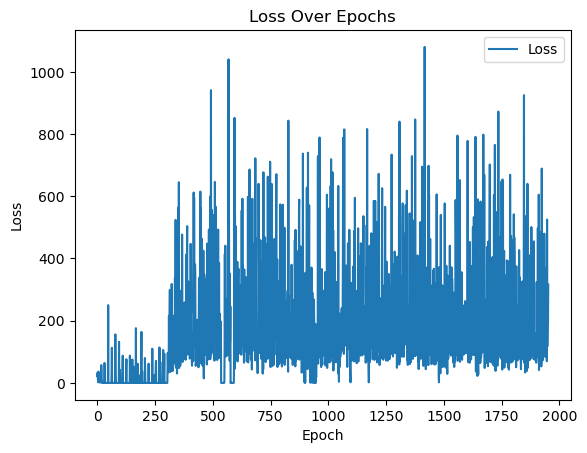

In [2]:
file_path = "./loss.txt"  # Replace with your actual file path
plot_loss(file_path)

In [7]:
import numpy as np

def plot_mean_loss(file_path):
    with open(file_path, 'r') as file:
        # Read lines and convert to float
        losses = [float(line.strip()) for line in file]
    mean_losses = np.cumsum(losses) / (np.arange(len(losses)) + 1)

    # Plot the mean loss values
    plt.plot(mean_losses, label='Mean Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Loss')
    plt.title('Mean Loss Over Epochs')
    plt.legend()
    plt.show()

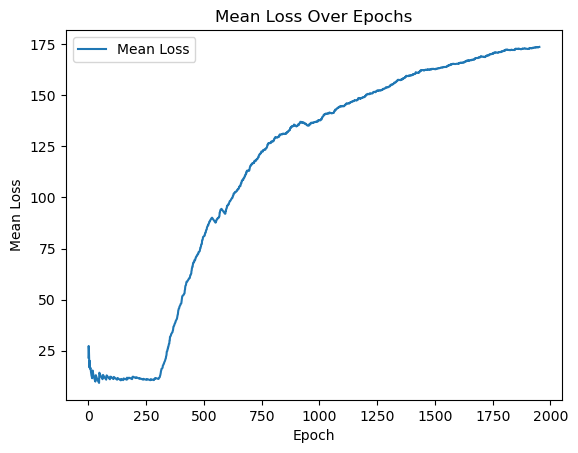

In [8]:
plot_mean_loss(file_path)

# 4. Test it Out

In [19]:
# Load model
model = PPO.load('./best_model_1000000')

In [20]:
state = env.reset()

In [21]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

C:\Users\Dragos\anaconda3\envs\AI_Environment\Lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


KeyboardInterrupt: 

In [22]:
env.close()